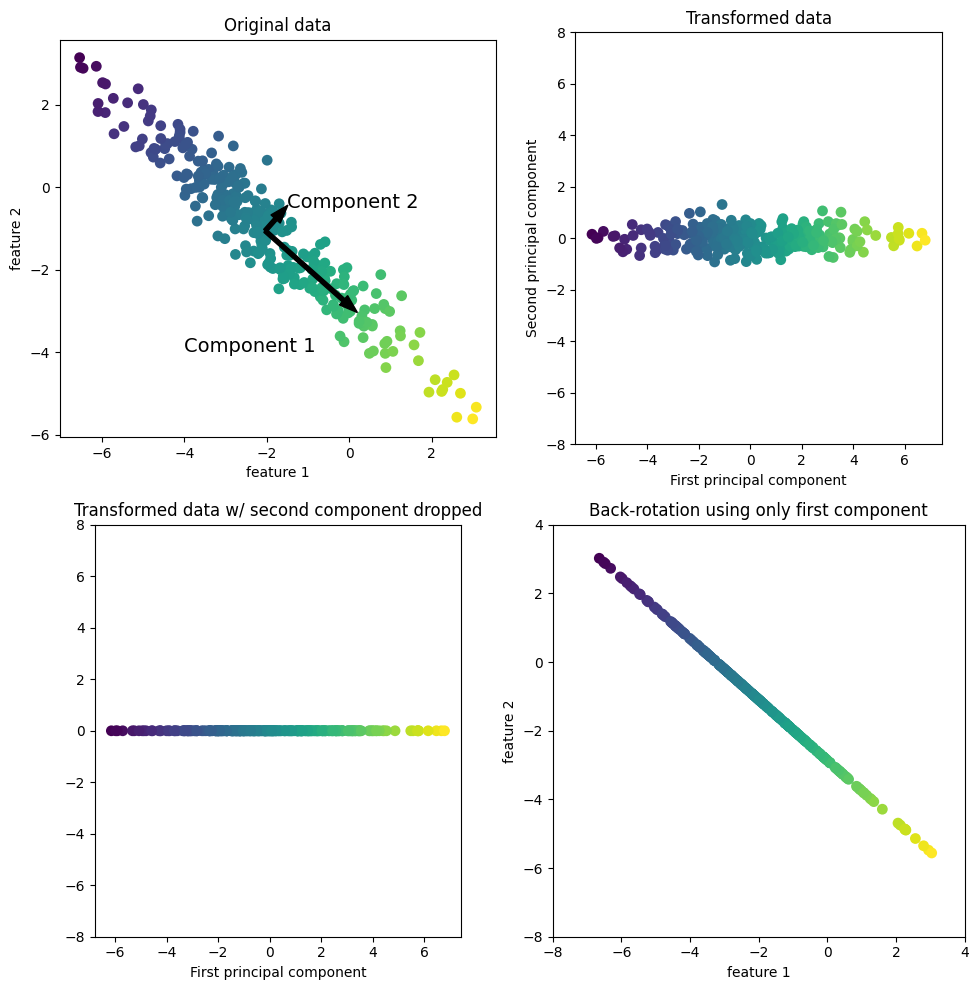

In [1]:
    import mglearn
    import matplotlib.pyplot as plt
    
    mglearn.plots.plot_pca_illustration()
    
    plt.tight_layout()
    plt.savefig('Images/02DimensionalityReduction-01.png', bbox_inches='tight')
    plt.show()

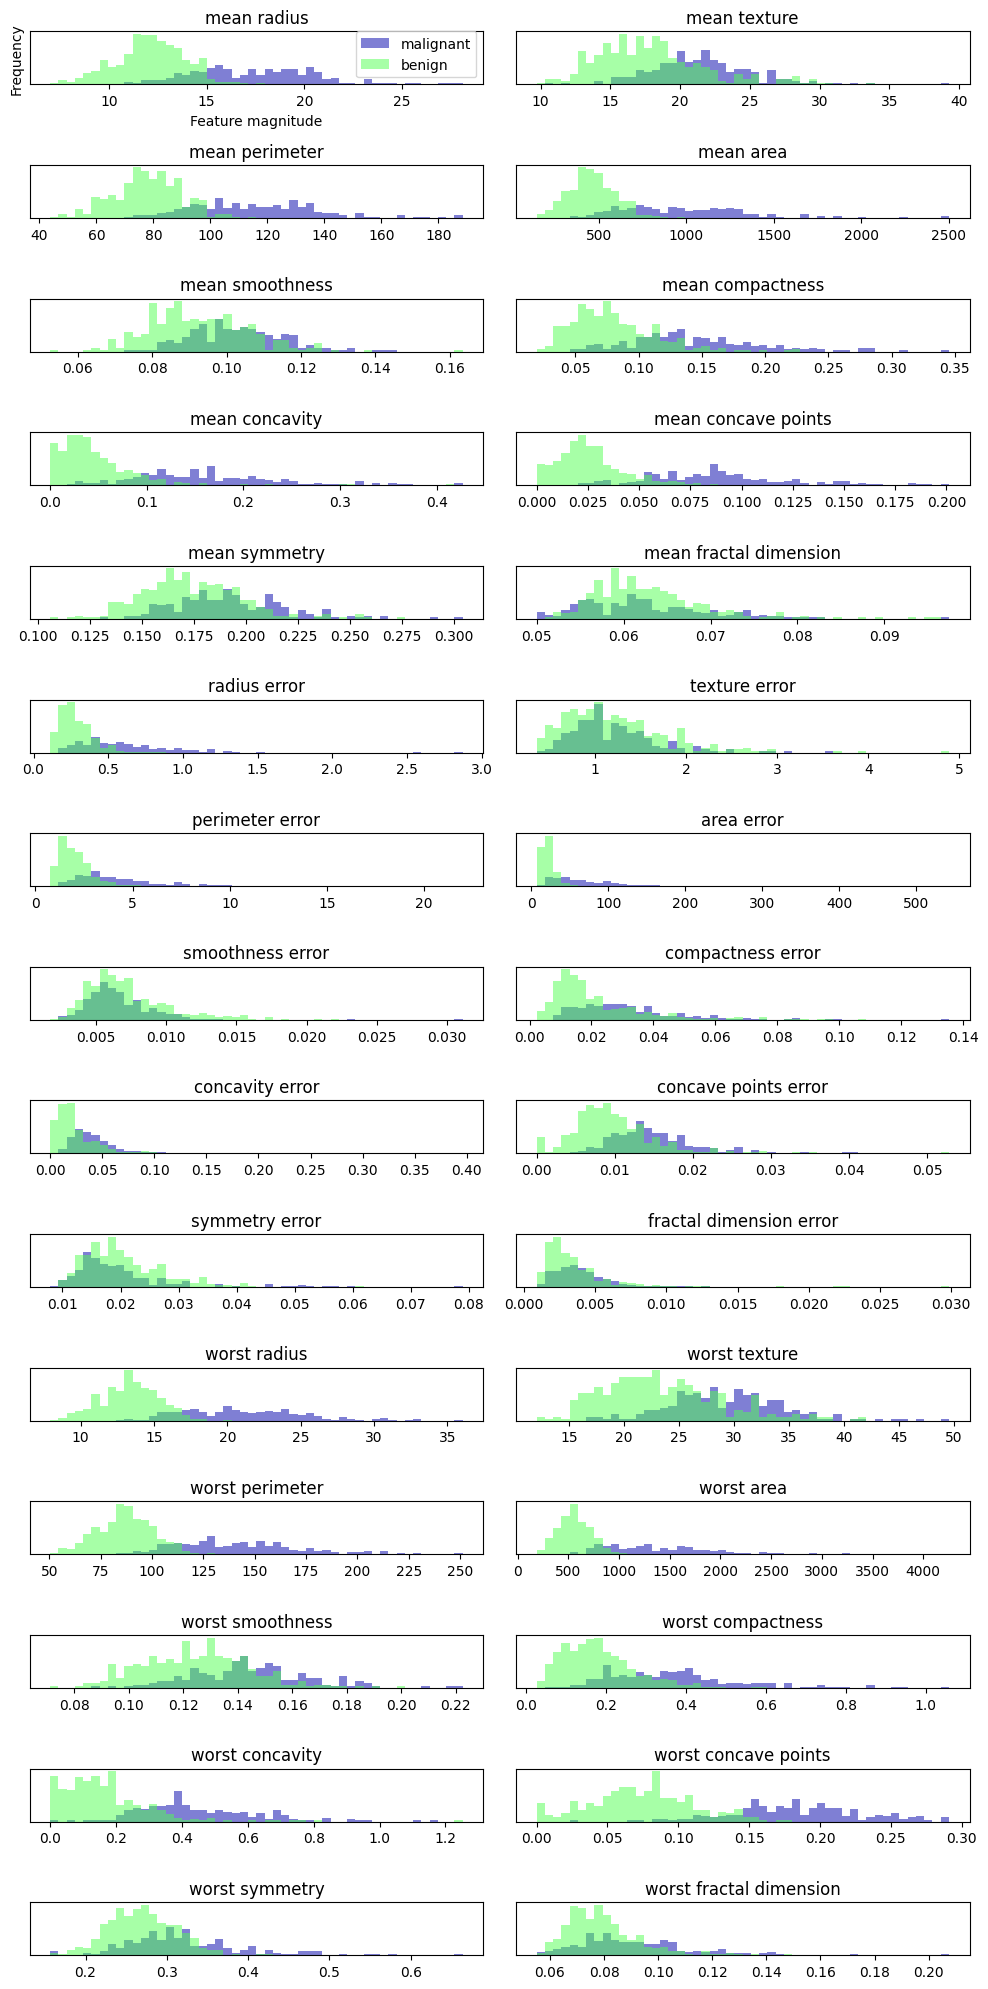

In [2]:
import numpy as np
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

plt.savefig('Images/02DimensionalityReduction-02.png', bbox_inches='tight')
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)


In [4]:
from sklearn.decomposition import PCA
# 保留数据的前两个主成分
pca = PCA(n_components=2)
# 对乳腺癌数据拟合PCA模型
pca.fit(X_scaled)

# 将数据变换到前两个主成分的方向上
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


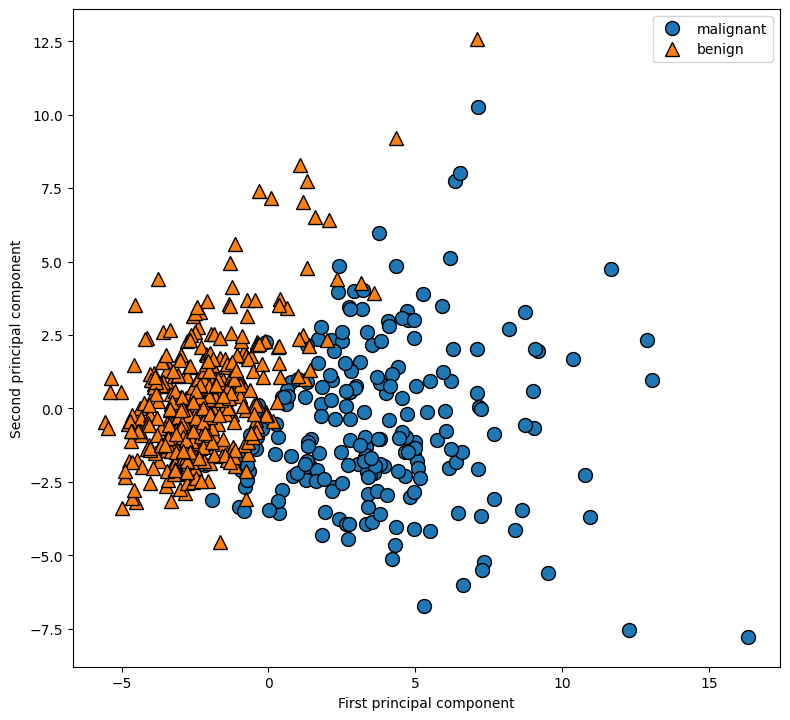

In [5]:

# 对第一个和第二个主成分作图，按类别着色
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

plt.tight_layout()
plt.savefig('Images/02DimensionalityReduction-03.png', bbox_inches='tight')
plt.show()

In [6]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [7]:
print("PCA components:\n{}".format(pca.components_))


PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


C:\Users\xiankui.qin\AppData\Local\Temp\ipykernel_182476\1409828304.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


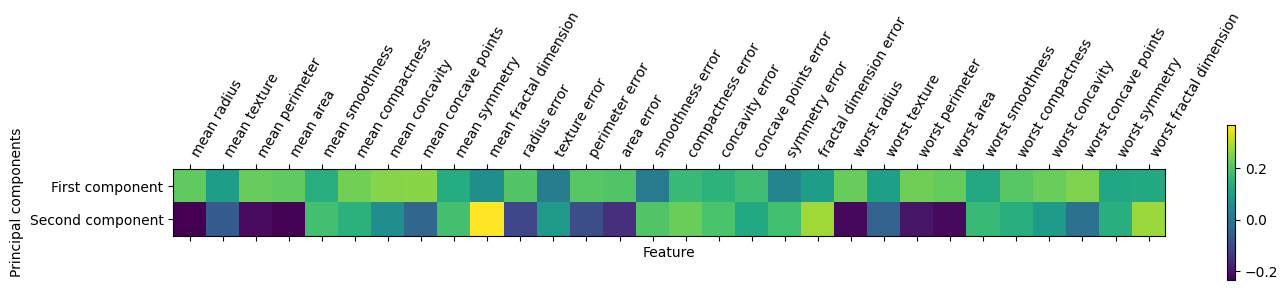

In [8]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

plt.tight_layout()
plt.savefig('Images/02DimensionalityReduction-04.png', bbox_inches='tight')
plt.show()

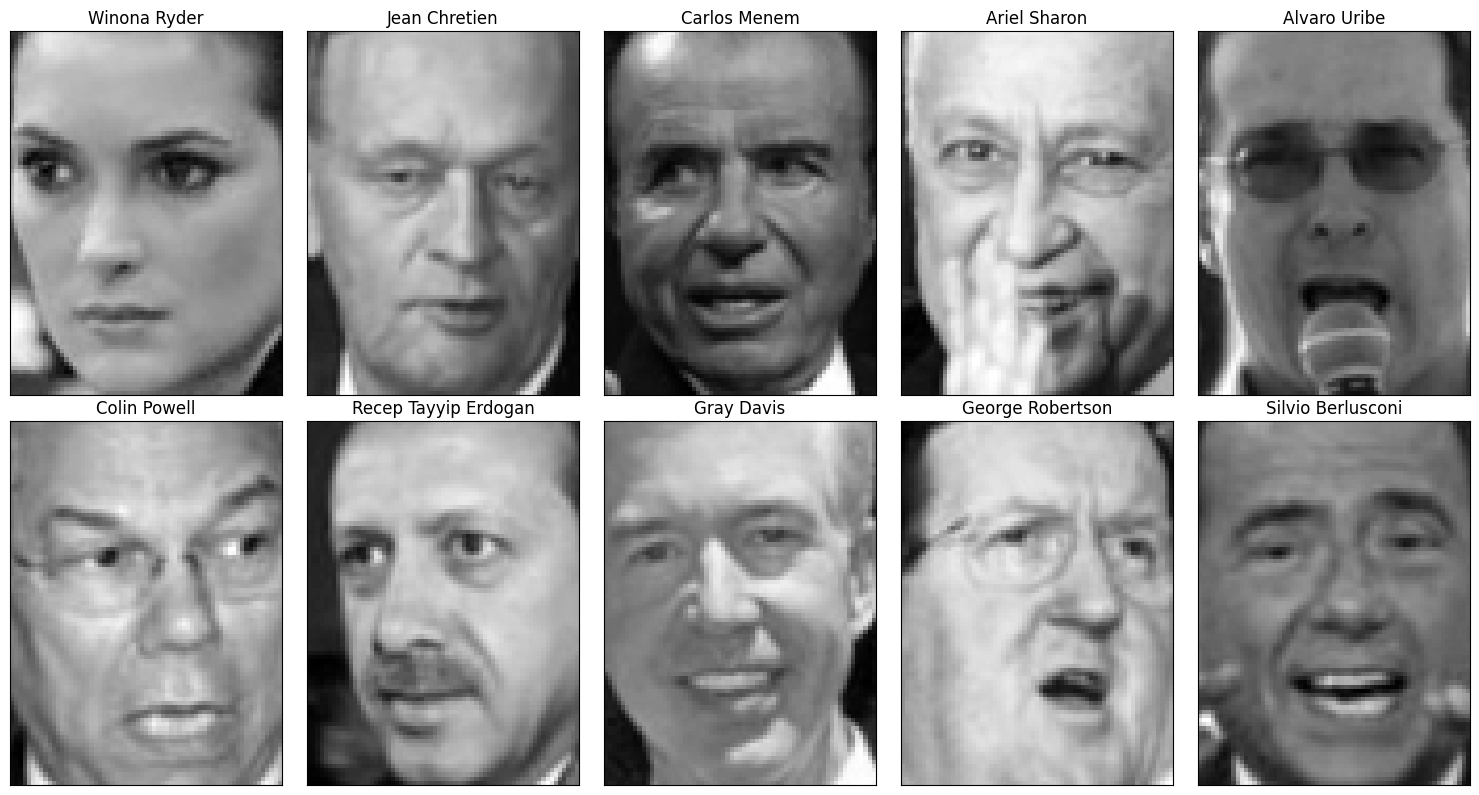

In [9]:
import os
import shutil
from sklearn.datasets import get_data_home
from sklearn.datasets import fetch_lfw_people

# 获取数据缓存目录
data_home = get_data_home()

# 删除缓存的LFW数据集
lfw_dir = os.path.join(data_home, 'lfw_home')
if os.path.exists(lfw_dir):
    shutil.rmtree(lfw_dir)

# 重新下载数据集
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7, download_if_missing=True)
image_shape = people.images[0].shape

# 绘制图像
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

i=0
for ax, image, target in zip(axes.ravel(), people.images, people.target):
    ax.imshow(image, cmap='gray')
    ax.set_title(people.target_names[target])

plt.tight_layout()
plt.savefig('Images/02DimensionalityReduction-05.png', bbox_inches='tight')
plt.show()

In [10]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [11]:
# 计算每个目标出现的次数
counts = np.bincount(people.target)
# 将次数与目标名称一起打印出来
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

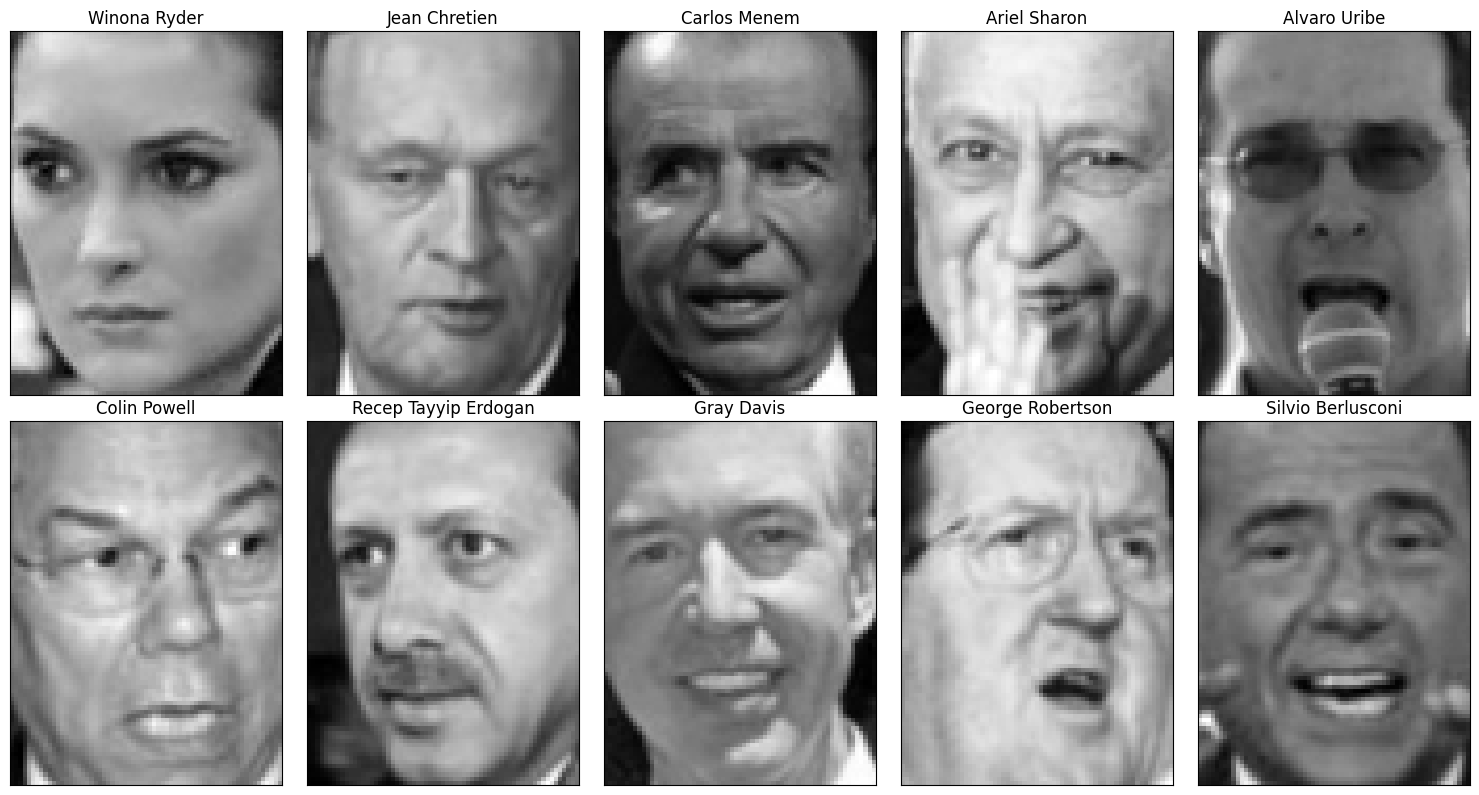

In [13]:

# 创建一个掩码，用于选择每个人的前50张照片
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = True

# 使用掩码过滤数据
X_people = people.data[mask]
y_people = people.target[mask]

# 将灰度值缩放到0到1之间，而不是在0到255之间，以获得更好的数据稳定性
X_people = X_people / 255.0

# 显示部分图像
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for ax, image, target in zip(axes.ravel(), X_people, y_people):
    ax.imshow(image.reshape(image_shape), cmap='gray')
    ax.set_title(people.target_names[target])

plt.tight_layout()
plt.savefig('Images/02DimensionalityReduction-06.png', bbox_inches='tight')
plt.show()

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# 使用一个邻居构建KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.22


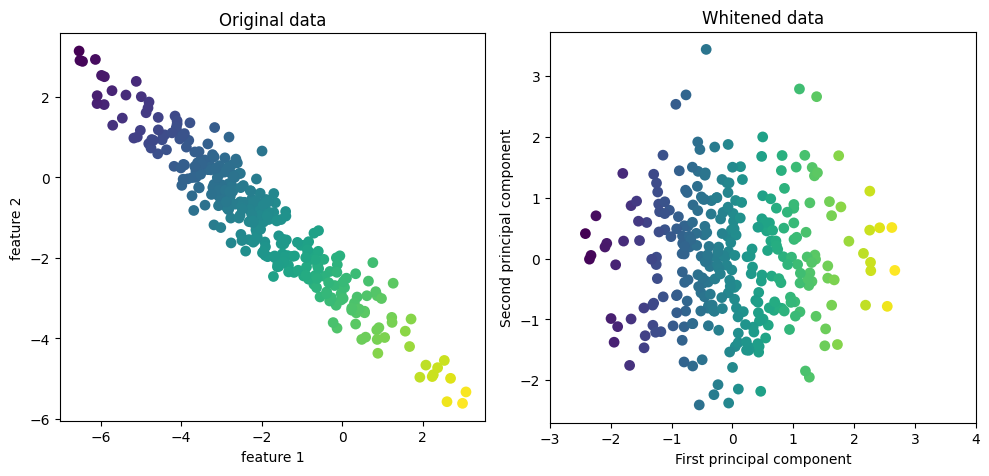

In [15]:
mglearn.plots.plot_pca_whitening()

plt.tight_layout()
plt.savefig('Images/02DimensionalityReduction-07.png', bbox_inches='tight')
plt.show()

In [16]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.3f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.297


In [18]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


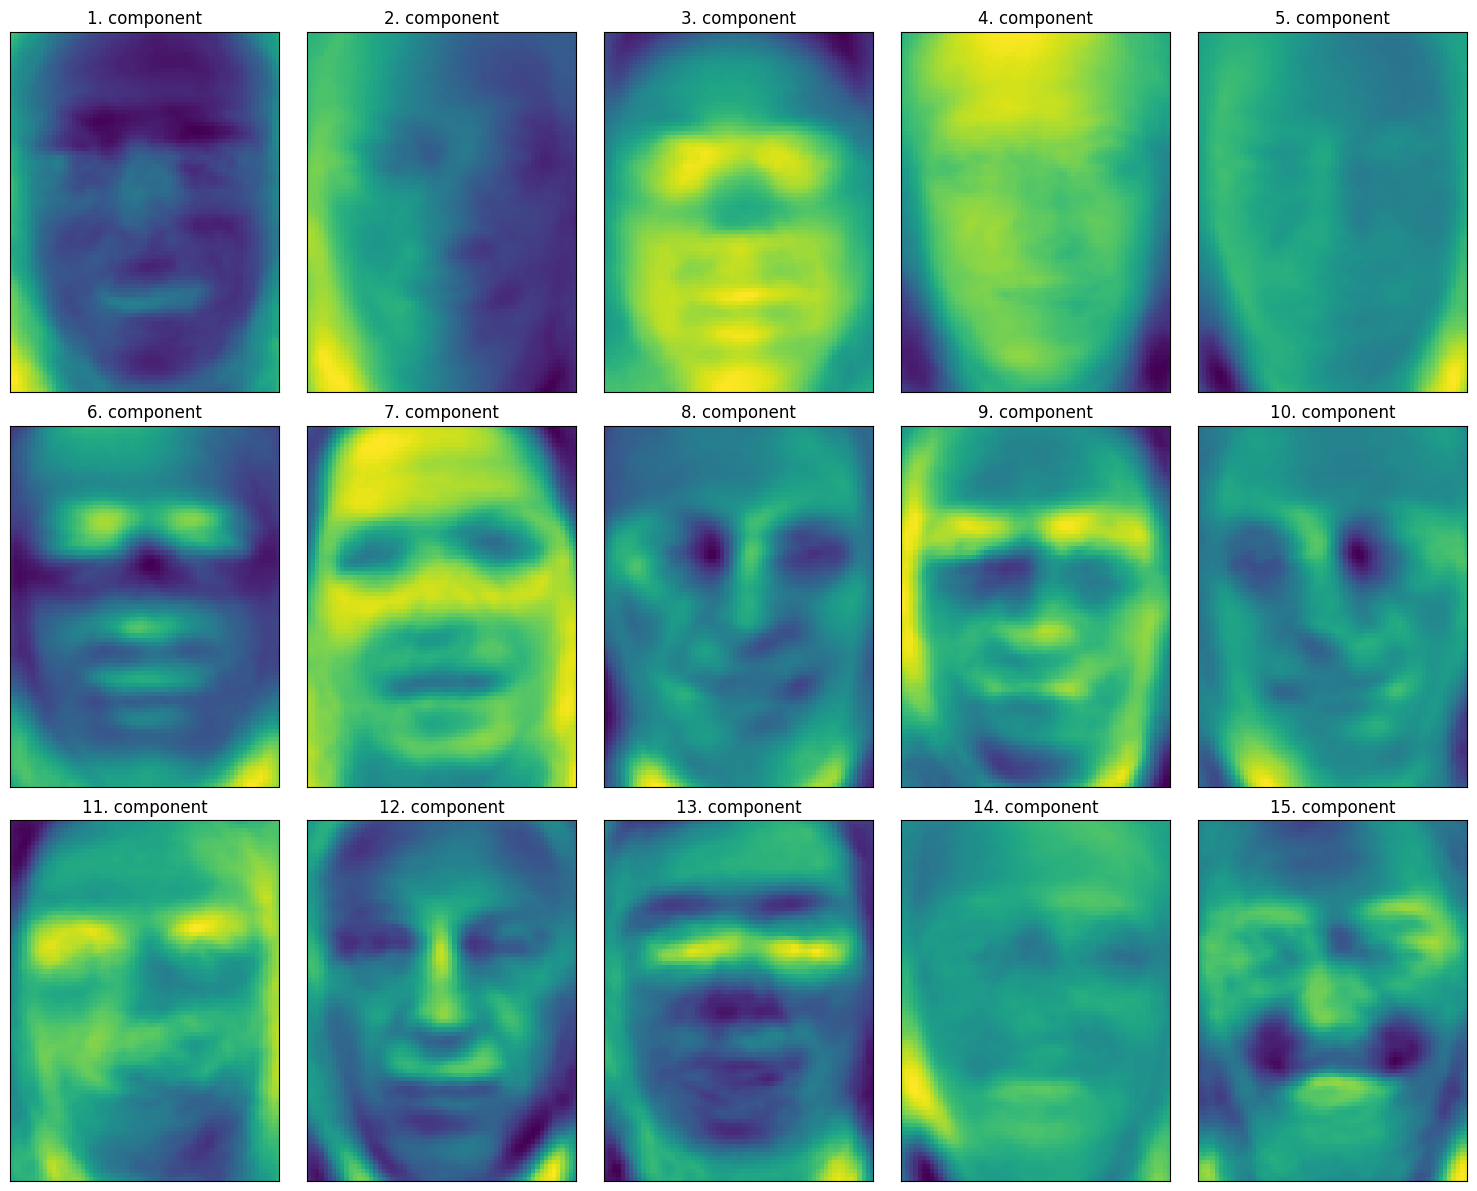

In [19]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

plt.tight_layout()
plt.savefig('Images/02DimensionalityReduction-08.png', bbox_inches='tight')
plt.show()

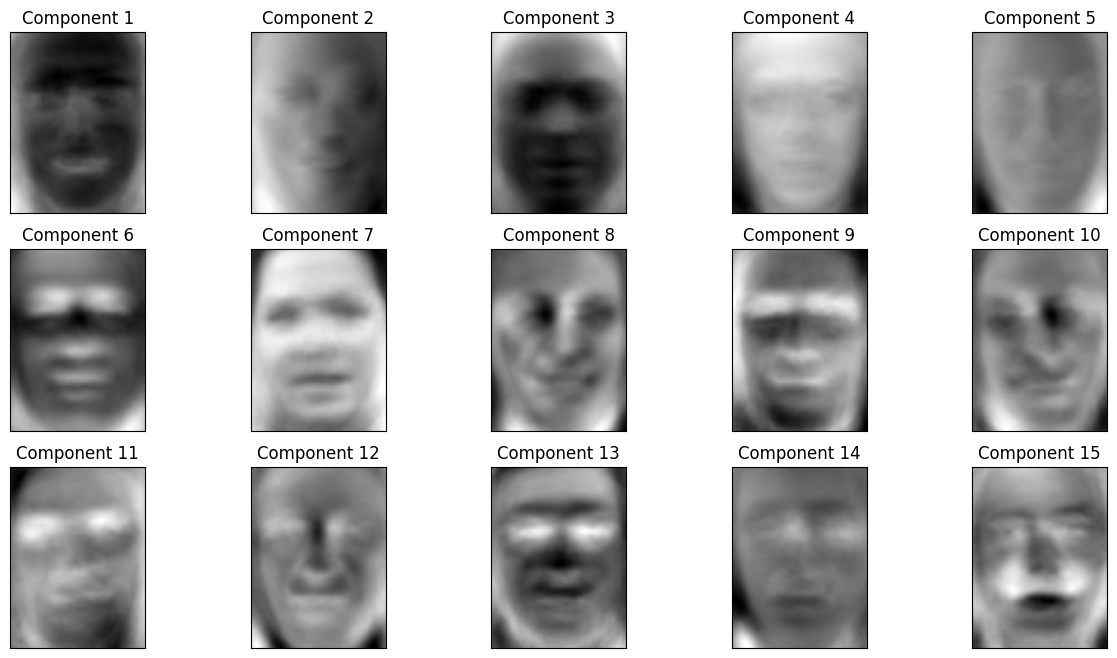

<Figure size 640x480 with 0 Axes>

In [27]:

def plot_pca_faces(X, image_shape):
    fig, axes = plt.subplots(3, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
    for i, (comp, ax) in enumerate(zip(pca.components_, axes.ravel())):
        ax.imshow(comp.reshape(image_shape), cmap='gray')
        ax.set_title(f"Component {i + 1}")
    plt.show()
plot_pca_faces(X_train_pca, image_shape)


plt.tight_layout()
plt.savefig('Images/02DimensionalityReduction-09.png', bbox_inches='tight')
plt.show()

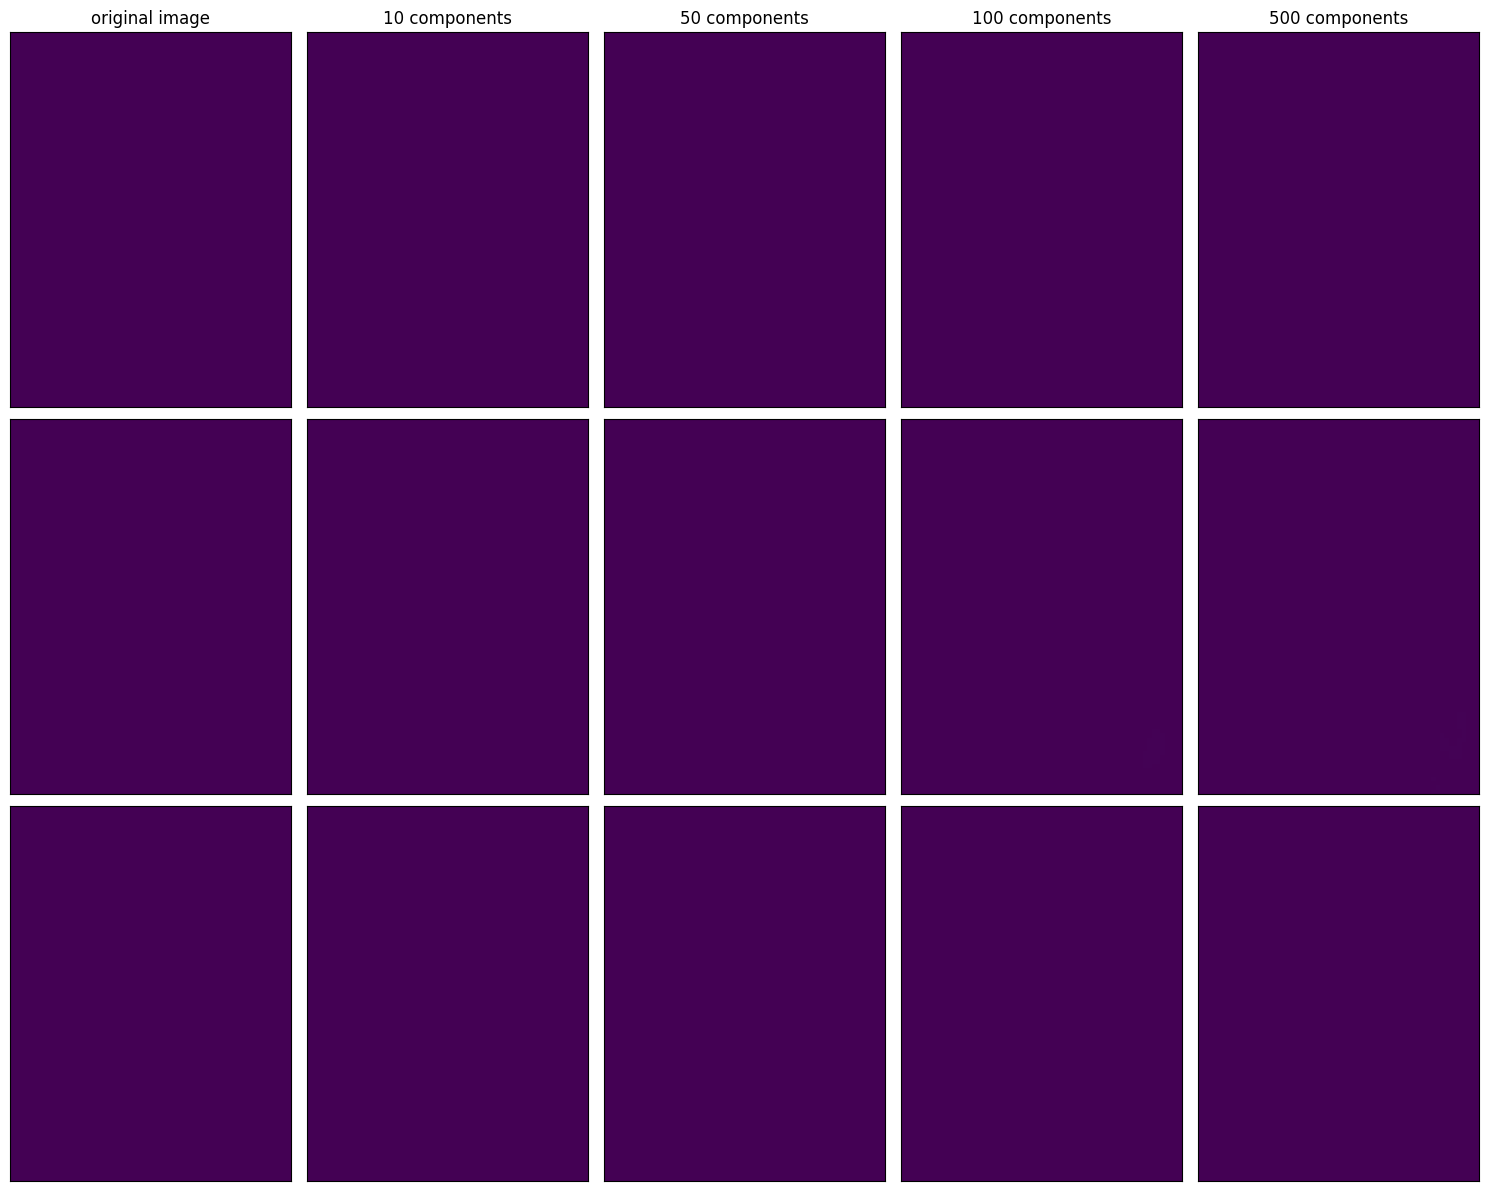

In [36]:
# 绘制 PCA 分析结果
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

plt.tight_layout()
plt.savefig('Images/02DimensionalityReduction-09.png', bbox_inches='tight')
plt.show()


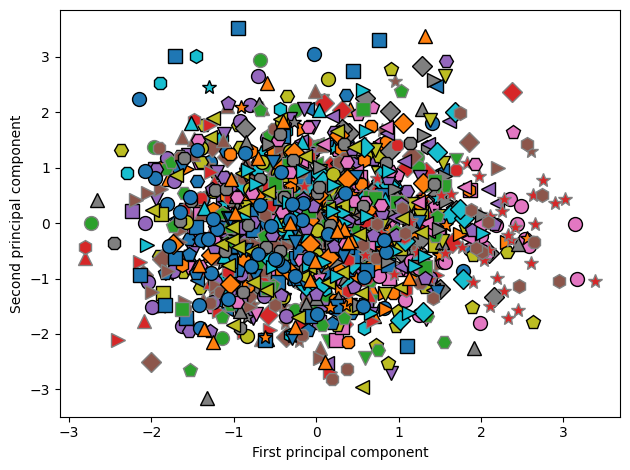

In [22]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

plt.tight_layout()
plt.savefig('Images/02DimensionalityReduction-10.png', bbox_inches='tight')
plt.show()

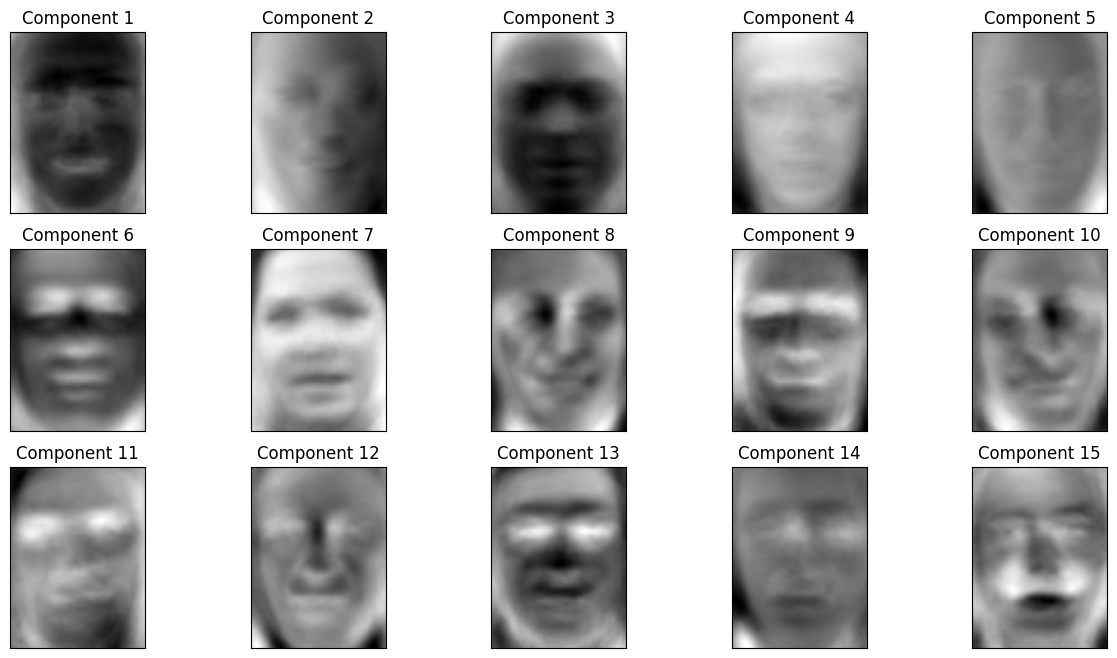

In [26]:
def plot_pca_faces(X, image_shape):
    fig, axes = plt.subplots(3, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
    for i, (comp, ax) in enumerate(zip(pca.components_, axes.ravel())):
        ax.imshow(comp.reshape(image_shape), cmap='gray')
        ax.set_title(f"Component {i + 1}")
    plt.show()

plot_pca_faces(X_train_pca, image_shape)

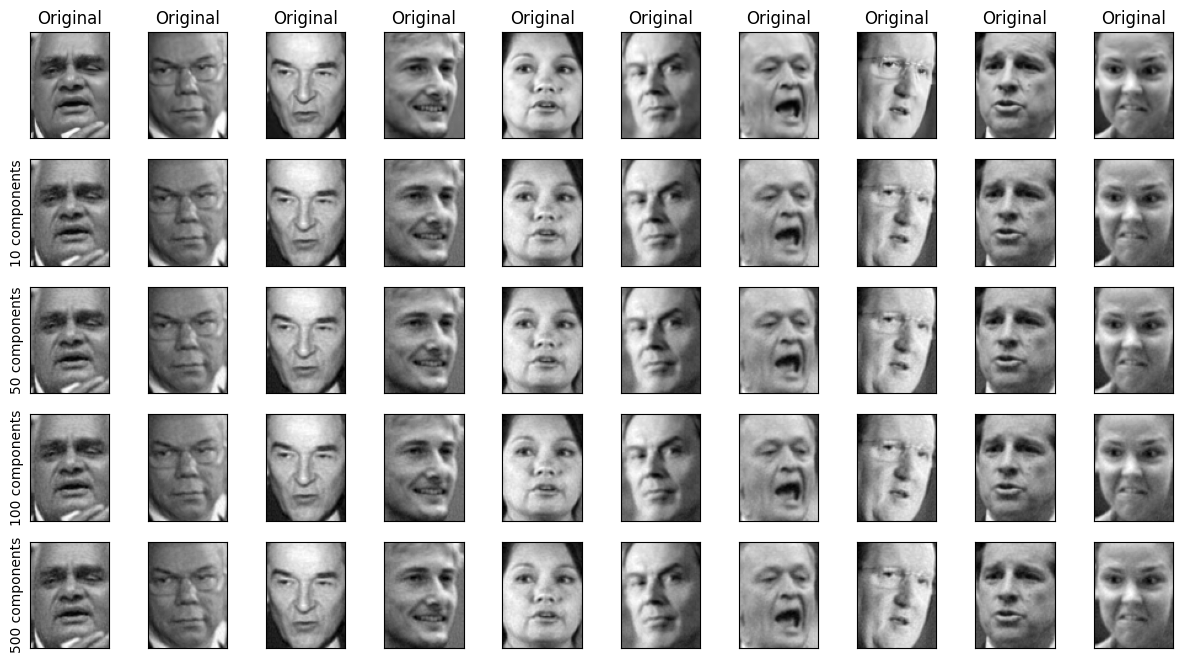

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# 加载数据集
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

# 创建掩码，用于选择每个人的前50张照片
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = True

# 使用掩码过滤数据
X_people = people.data[mask]
y_people = people.target[mask]

# 将灰度值缩放到0到1之间
X_people = X_people / 255.0

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=42)

# 执行 PCA 并保留最大数量的主成分
pca = PCA().fit(X_train)

# 重建人脸图像并可视化
def plot_reconstructed_faces(pca, X, n_components_list, image_shape, original_images):
    fig, axes = plt.subplots(len(n_components_list) + 1, 10, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
    
    for i in range(10):
        axes[0, i].imshow(original_images[i].reshape(image_shape), cmap='gray')
        axes[0, i].set_title("Original")
    
    for i, n_components in enumerate(n_components_list):
        pca.n_components = n_components
        X_pca = pca.transform(X)
        X_reconstructed = pca.inverse_transform(X_pca)
        for j in range(10):
            axes[i + 1, j].imshow(X_reconstructed[j].reshape(image_shape), cmap='gray')
            if j == 0:
                axes[i + 1, j].set_ylabel(f"{n_components} components")
    
    plt.show()

# 主成分数量列表，包括500个成分
n_components_list = [10, 50, 100, 500]
plot_reconstructed_faces(pca, X_test, n_components_list, image_shape, X_test[:10])


D:\Program Files\Anaconda3\envs\MachineLearningProject\Lib\site-packages\sklearn\decomposition\_nmf.py:1199: FutureWarning: The default value of `n_components` will change from `None` to `'auto'` in 1.6. Set the value of `n_components` to `None` explicitly to suppress the warning.
  warnings.warn(
D:\Program Files\Anaconda3\envs\MachineLearningProject\Lib\site-packages\sklearn\decomposition\_nmf.py:1199: FutureWarning: The default value of `n_components` will change from `None` to `'auto'` in 1.6. Set the value of `n_components` to `None` explicitly to suppress the warning.
  warnings.warn(
D:\Program Files\Anaconda3\envs\MachineLearningProject\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


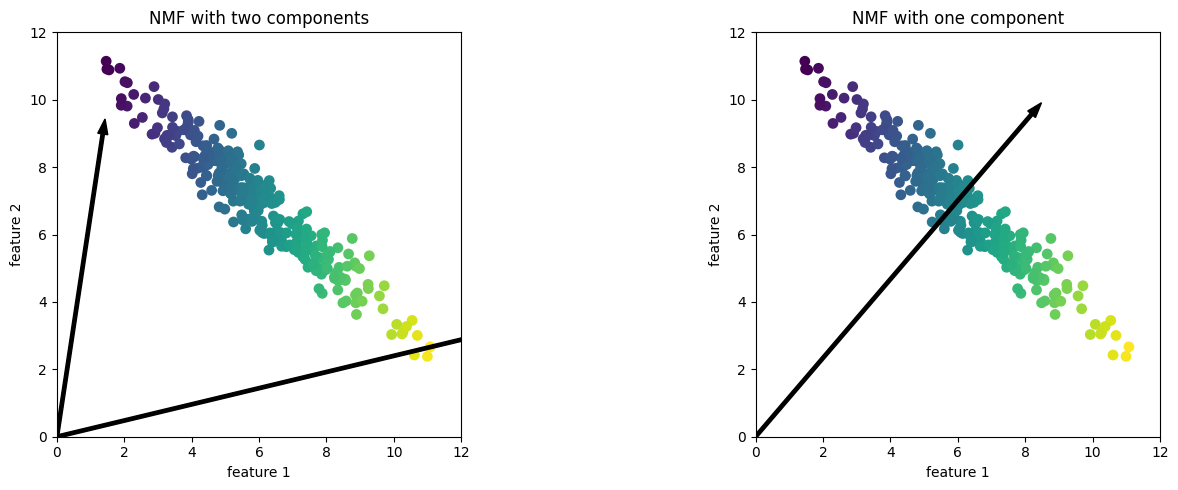

In [39]:
mglearn.plots.plot_nmf_illustration()

plt.tight_layout()
plt.savefig('Images/02DimensionalityReduction-11.png', bbox_inches='tight')
plt.show()

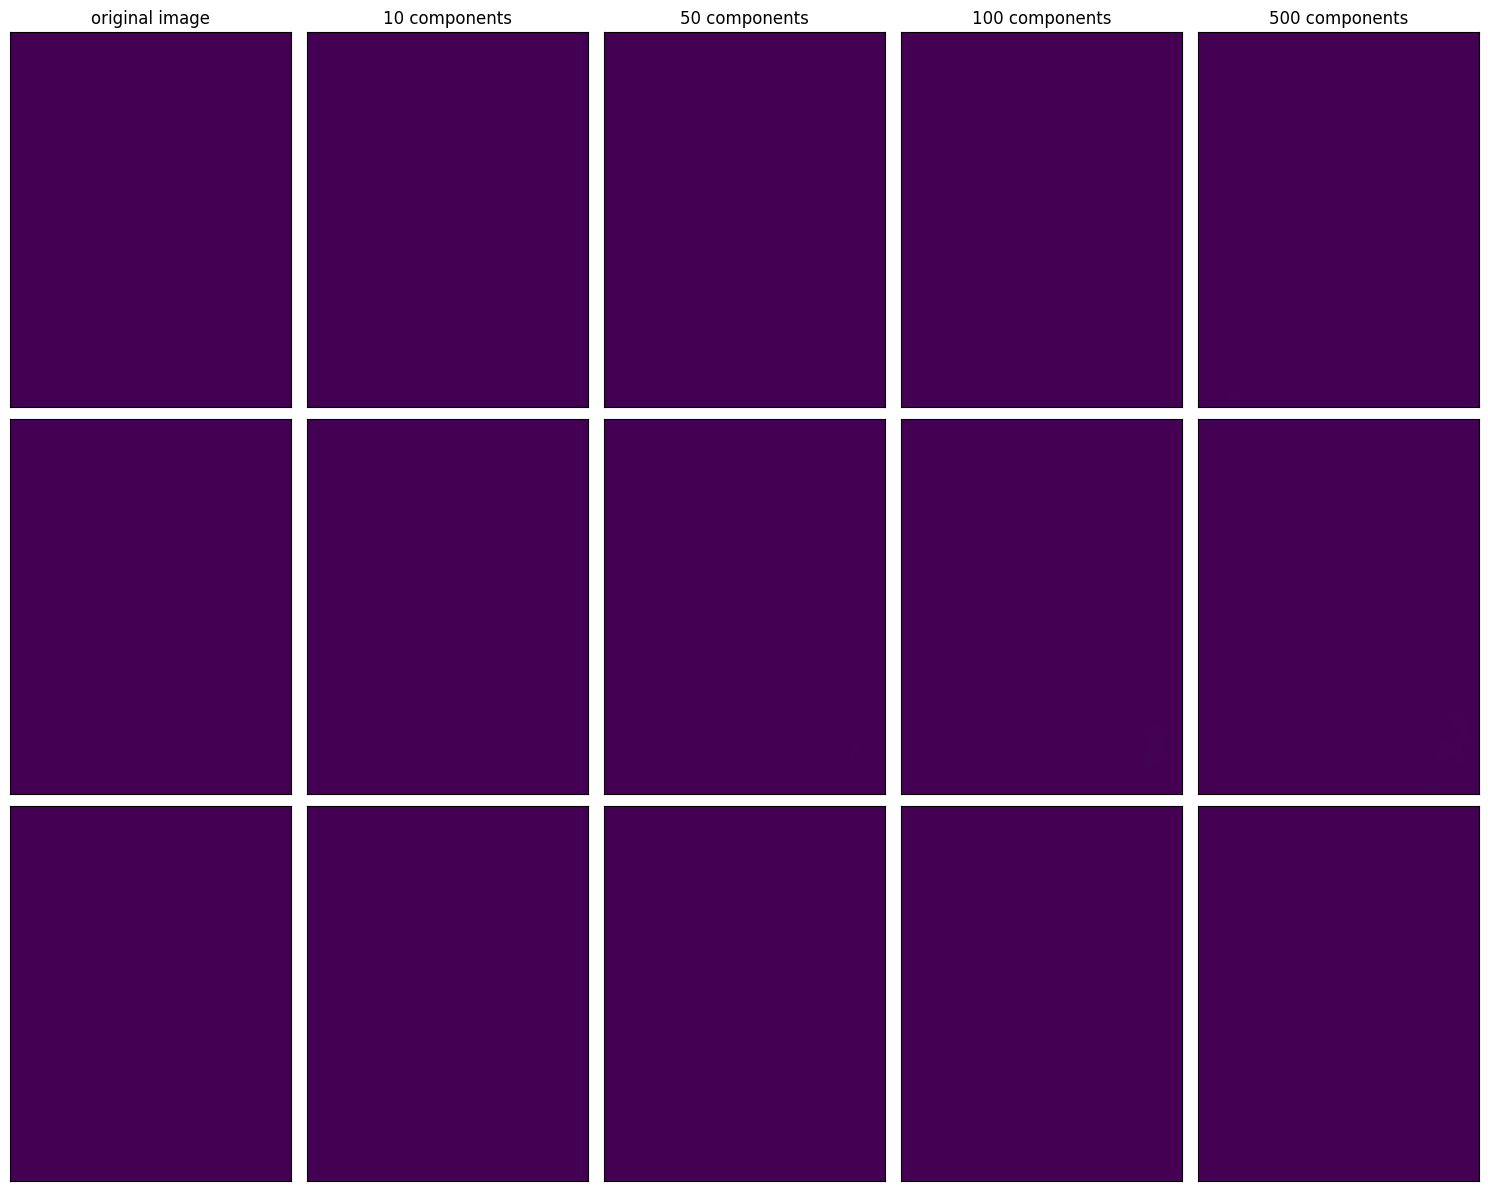

In [43]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

plt.tight_layout()
plt.savefig('Images/02DimensionalityReduction-12.png', bbox_inches='tight')
plt.show()

D:\Program Files\Anaconda3\envs\MachineLearningProject\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


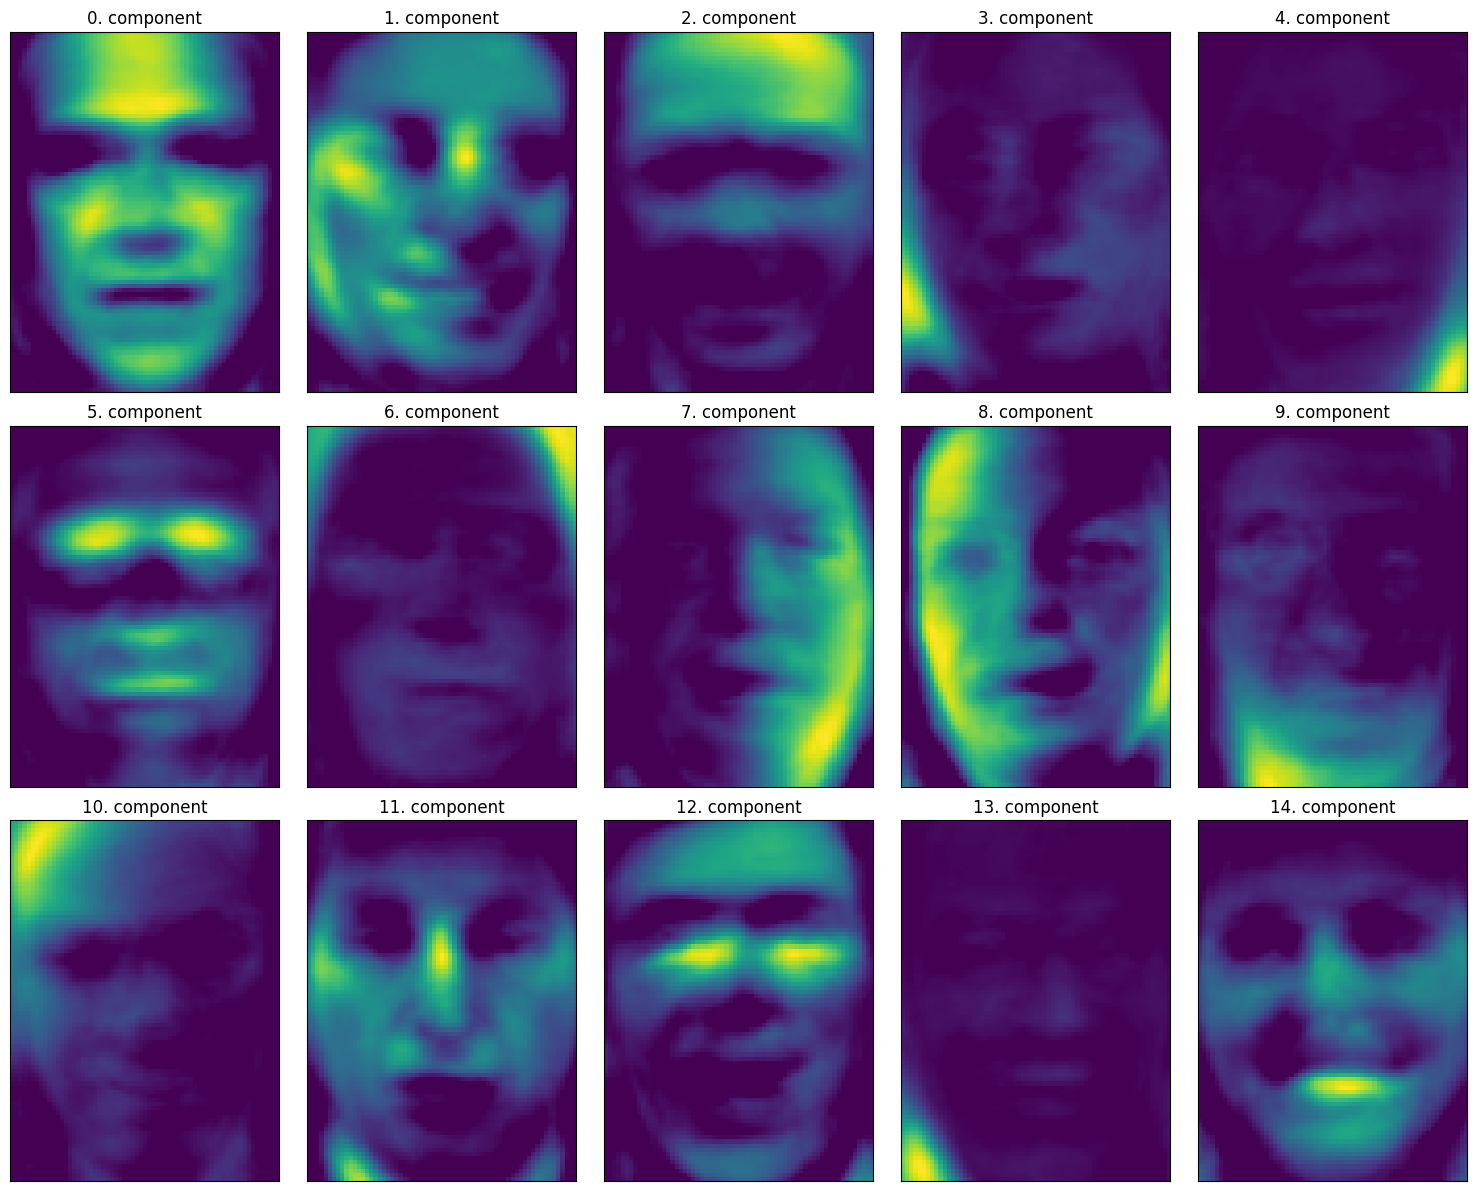

In [45]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

plt.tight_layout()
plt.savefig('Images/02DimensionalityReduction-13.png', bbox_inches='tight')
plt.show()

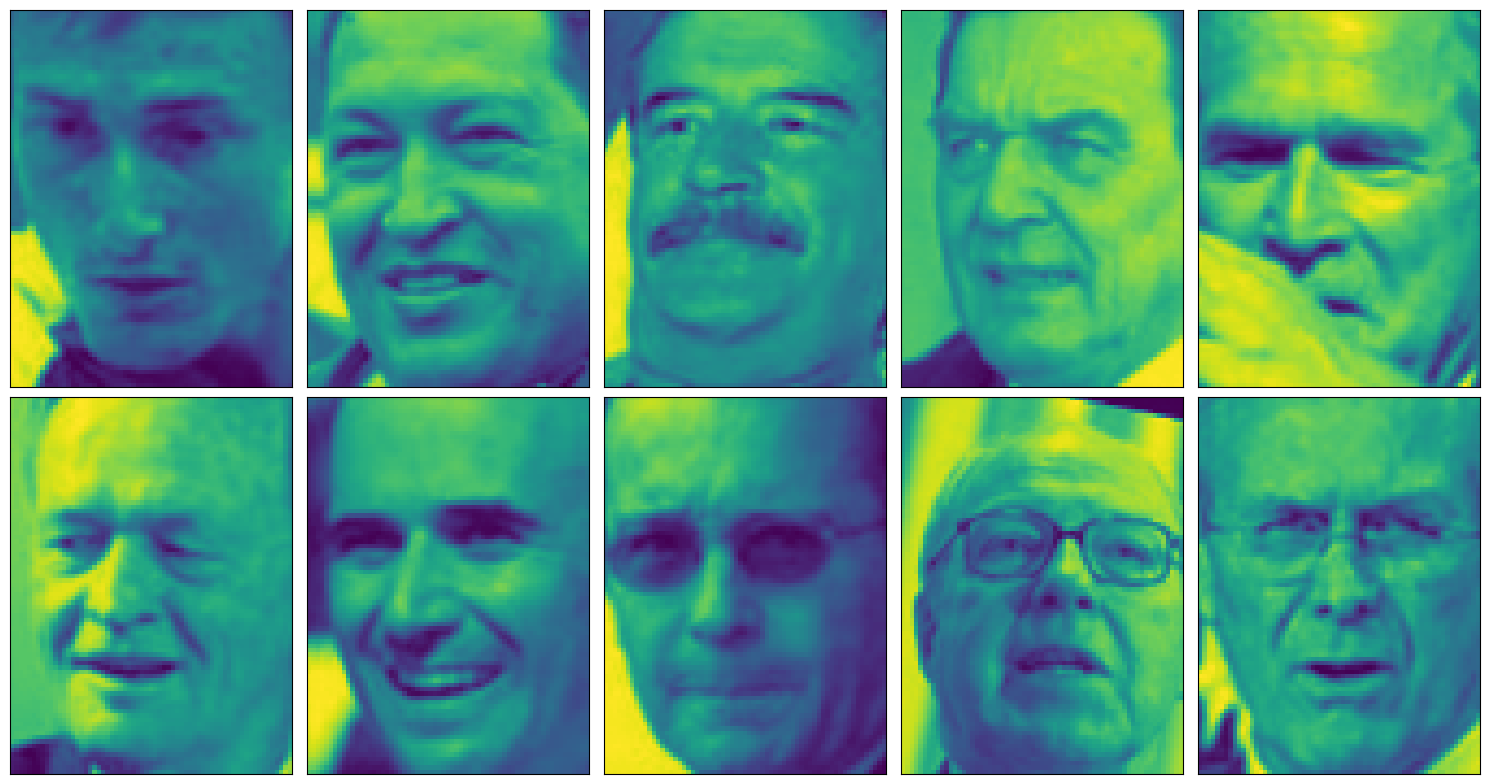

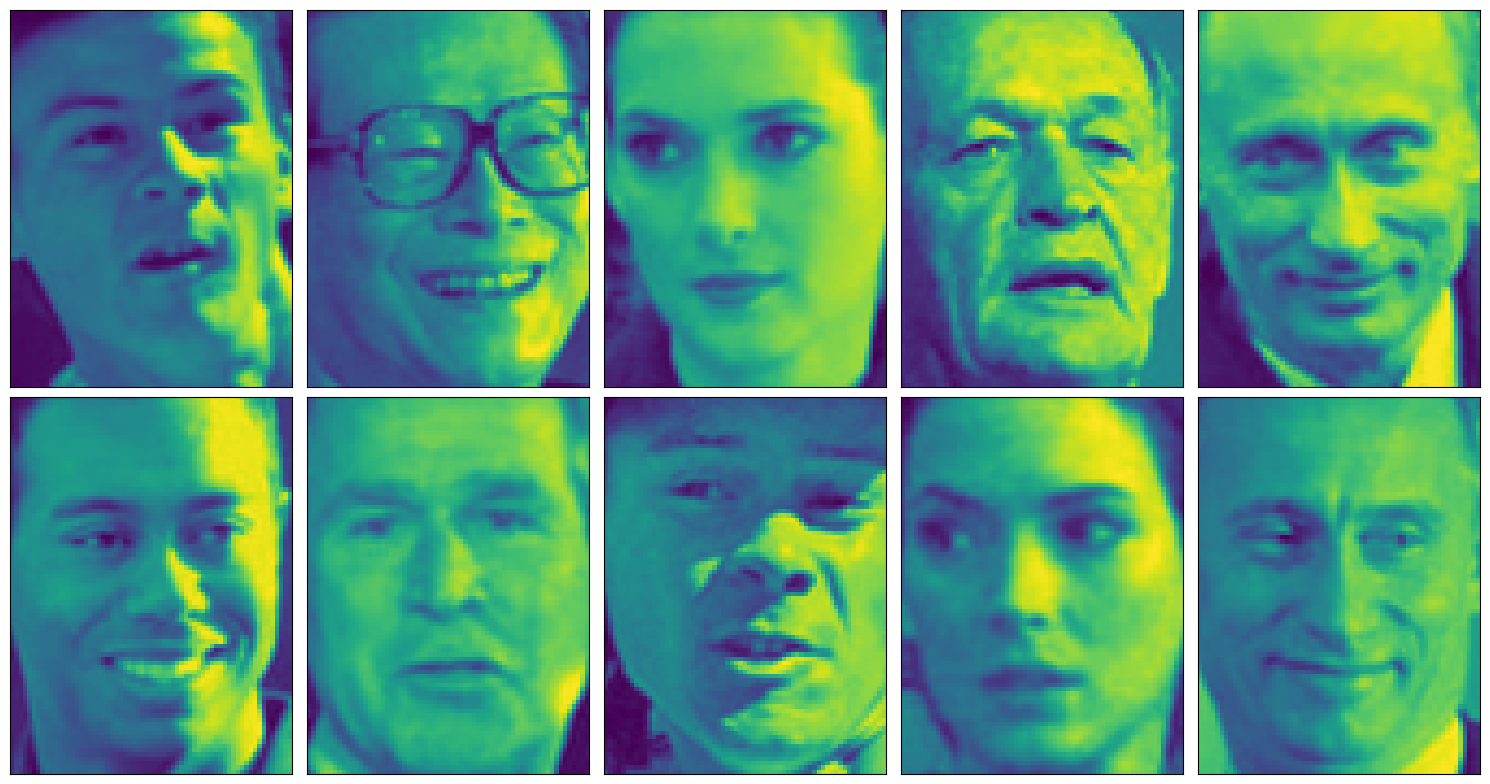

In [51]:
compn = 3
# 按第3个分量排序，绘制前10张图像
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

plt.tight_layout()
plt.savefig('Images/02DimensionalityReduction-14.png', bbox_inches='tight')
plt.show()

compn = 7
# 按第7个分量排序，绘制前10张图像
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
nn = 14
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

plt.tight_layout()
plt.savefig('Images/02DimensionalityReduction-15.png', bbox_inches='tight')
plt.show()



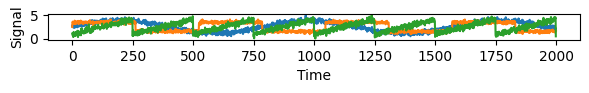

In [53]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

plt.tight_layout()
plt.savefig('Images/02DimensionalityReduction-16.png', bbox_inches='tight')
plt.show()


In [54]:
# 将数据混合成100维的状态
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


In [55]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


In [56]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

C:\Users\xiankui.qin\AppData\Local\Temp\ipykernel_182476\1498302102.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


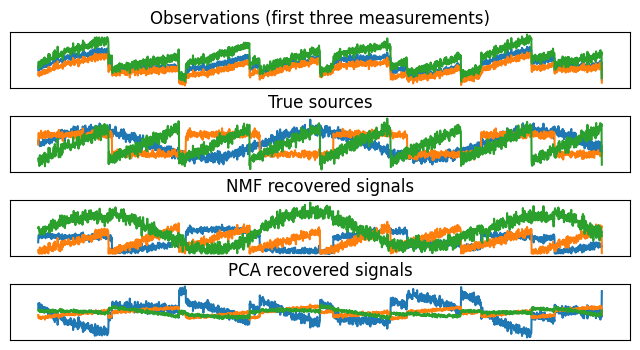

In [57]:

models = [X, S, S_, H]
names = ['Observations (first three measurements)',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

plt.tight_layout()
plt.savefig('Images/02DimensionalityReduction-17.png', bbox_inches='tight')
plt.show()

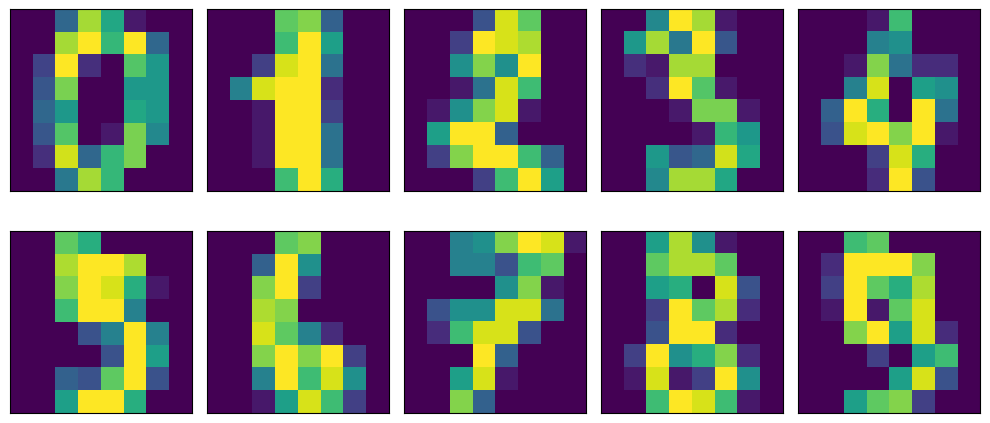

In [59]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

plt.tight_layout()
plt.savefig('Images/02DimensionalityReduction-18.png', bbox_inches='tight')
plt.show()

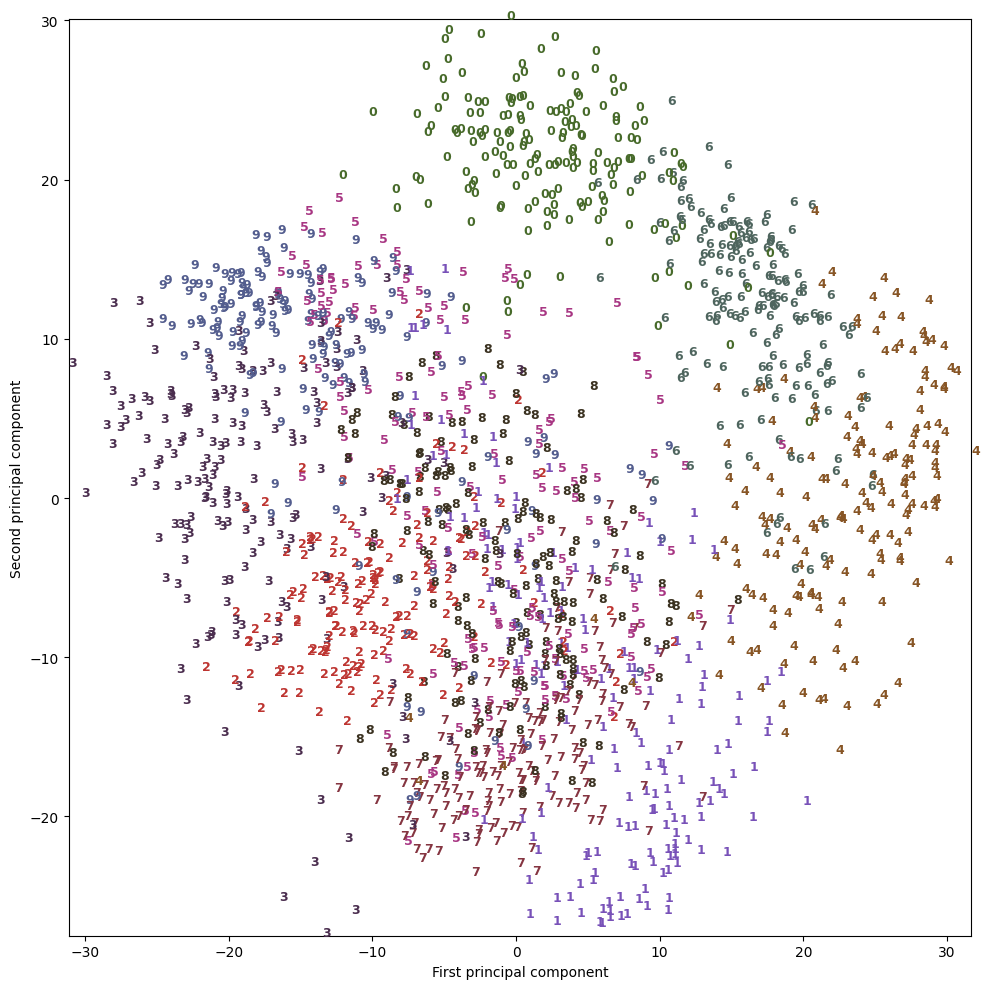

In [61]:
# 构建一个PCA模型
pca = PCA(n_components=2)
pca.fit(digits.data)
# 将digits数据变换到前两个主成分的方向上
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 将数据实际绘制成文本，而不是散点
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

plt.tight_layout()
plt.savefig('Images/02DimensionalityReduction-19.png', bbox_inches='tight')
plt.show()

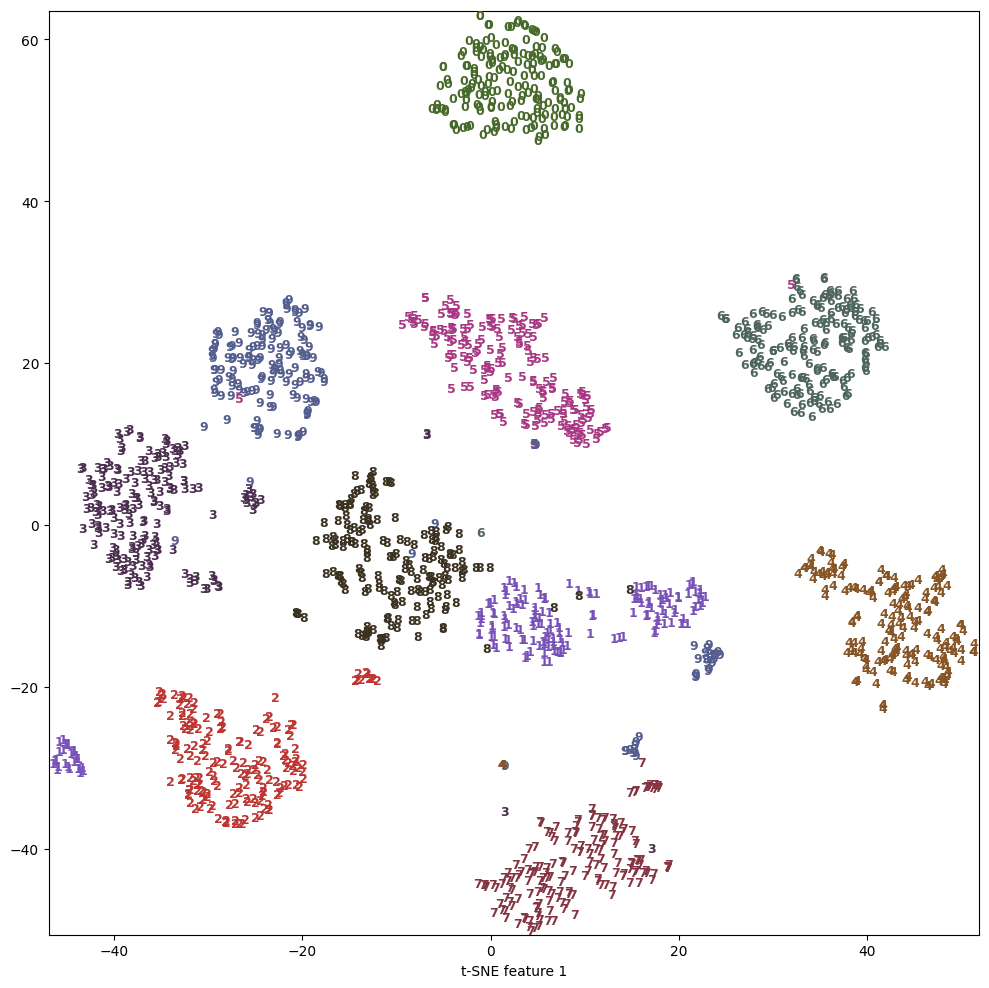

In [63]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# 使用fit_transform而不是fit，因为TSNE没有transform方法
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 将数据实际绘制成文本，而不是散点
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")

plt.tight_layout()
plt.savefig('Images/02DimensionalityReduction-20.png', bbox_inches='tight')
plt.show()

In [65]:
from sklearn.cluster import KMeans

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

D:\Program Files\Anaconda3\envs\MachineLearningProject\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


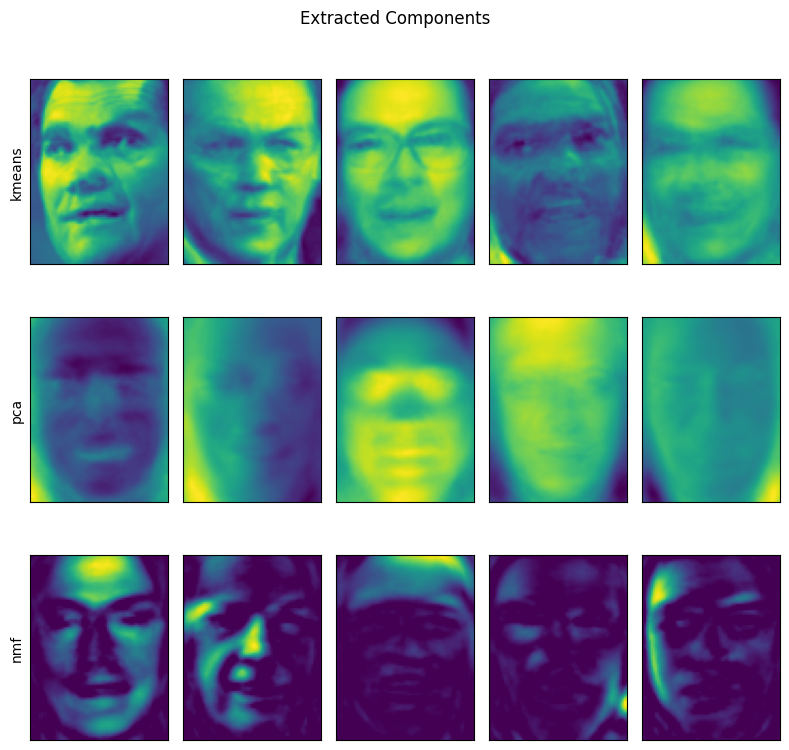

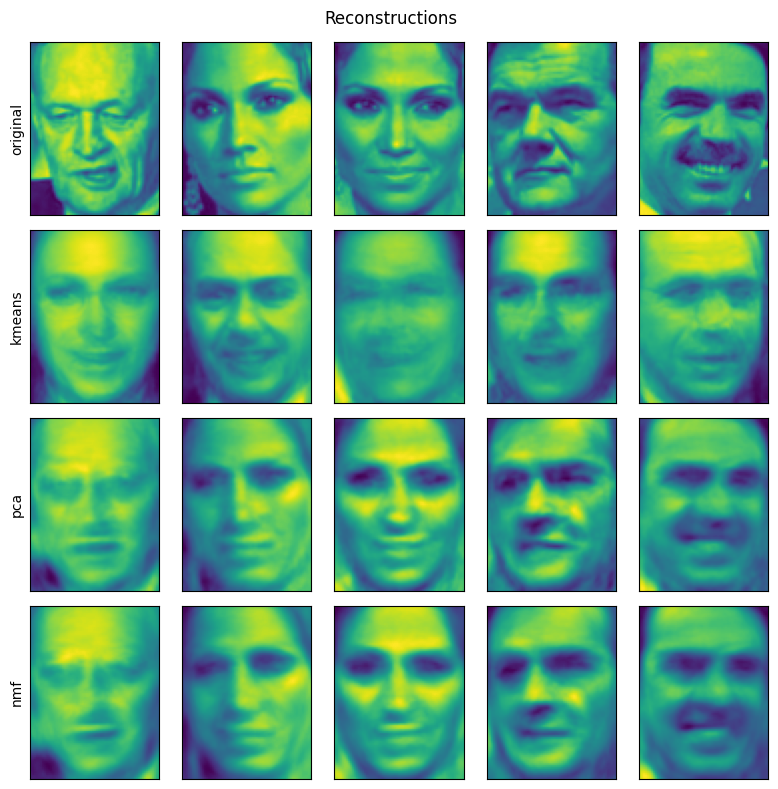

In [67]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

plt.tight_layout()
plt.savefig('Images/03Clustering-07.png', bbox_inches='tight')
plt.show()

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

plt.tight_layout()
plt.savefig('Images/03Clustering-08.png', bbox_inches='tight')
plt.show()

Cluster memberships:
[8 4 6 3 1 1 5 2 8 4 9 2 1 4 7 5 0 2 0 7 1 2 0 4 9 6 1 1 6 0 8 9 2 6 8 1 2
 5 3 6 2 7 8 6 4 9 5 7 6 2 7 2 1 3 4 8 0 4 0 9 2 3 1 8 4 3 9 4 9 3 2 3 2 6
 2 3 6 8 0 2 1 9 2 1 6 9 5 9 2 1 0 5 1 7 1 1 4 2 3 6 4 1 9 5 3 6 3 7 4 0 7
 9 9 3 8 4 8 1 2 8 8 7 6 9 6 7 5 6 4 1 5 7 3 6 4 4 4 3 1 8 6 6 0 9 7 5 6 4
 0 6 2 4 8 0 2 9 4 2 0 0 6 4 0 4 2 1 0 2 4 2 0 3 3 7 6 2 1 7 7 0 4 3 1 4 1
 0 9 2 3 7 3 0 8 5 6 7 1 6 9 4]


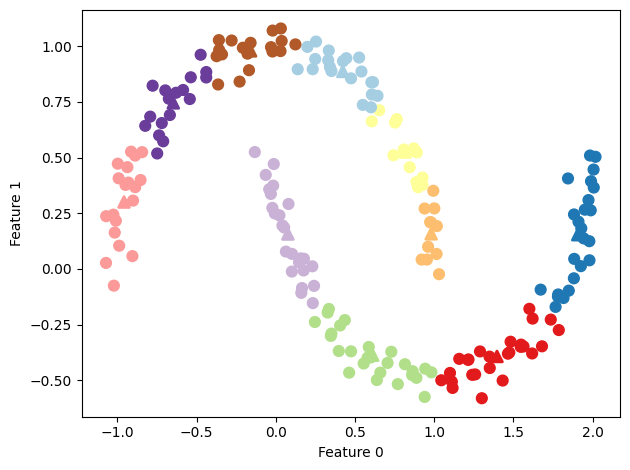

In [70]:
# 生成模拟的two_moons数据（这次的噪声较小）
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

plt.tight_layout()
plt.savefig('Images/03Clustering-09.png', bbox_inches='tight')
plt.show()


In [71]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.53664613 1.15017588 0.93237626 ... 1.48034956 0.002907   1.07736639]
 [1.74138152 0.60592307 1.00666225 ... 2.52921971 1.20779969 2.23716489]
 [0.75710543 1.93145038 0.91586549 ... 0.78321505 0.87573753 0.71838465]
 ...
 [0.9274342  1.73811046 0.57899268 ... 1.11471941 0.83358544 1.04125672]
 [0.3227627  1.97647071 1.47861069 ... 0.81425026 0.84551232 0.28446737]
 [1.63322944 0.47226506 1.02289983 ... 2.46626118 1.09767675 2.14812753]]


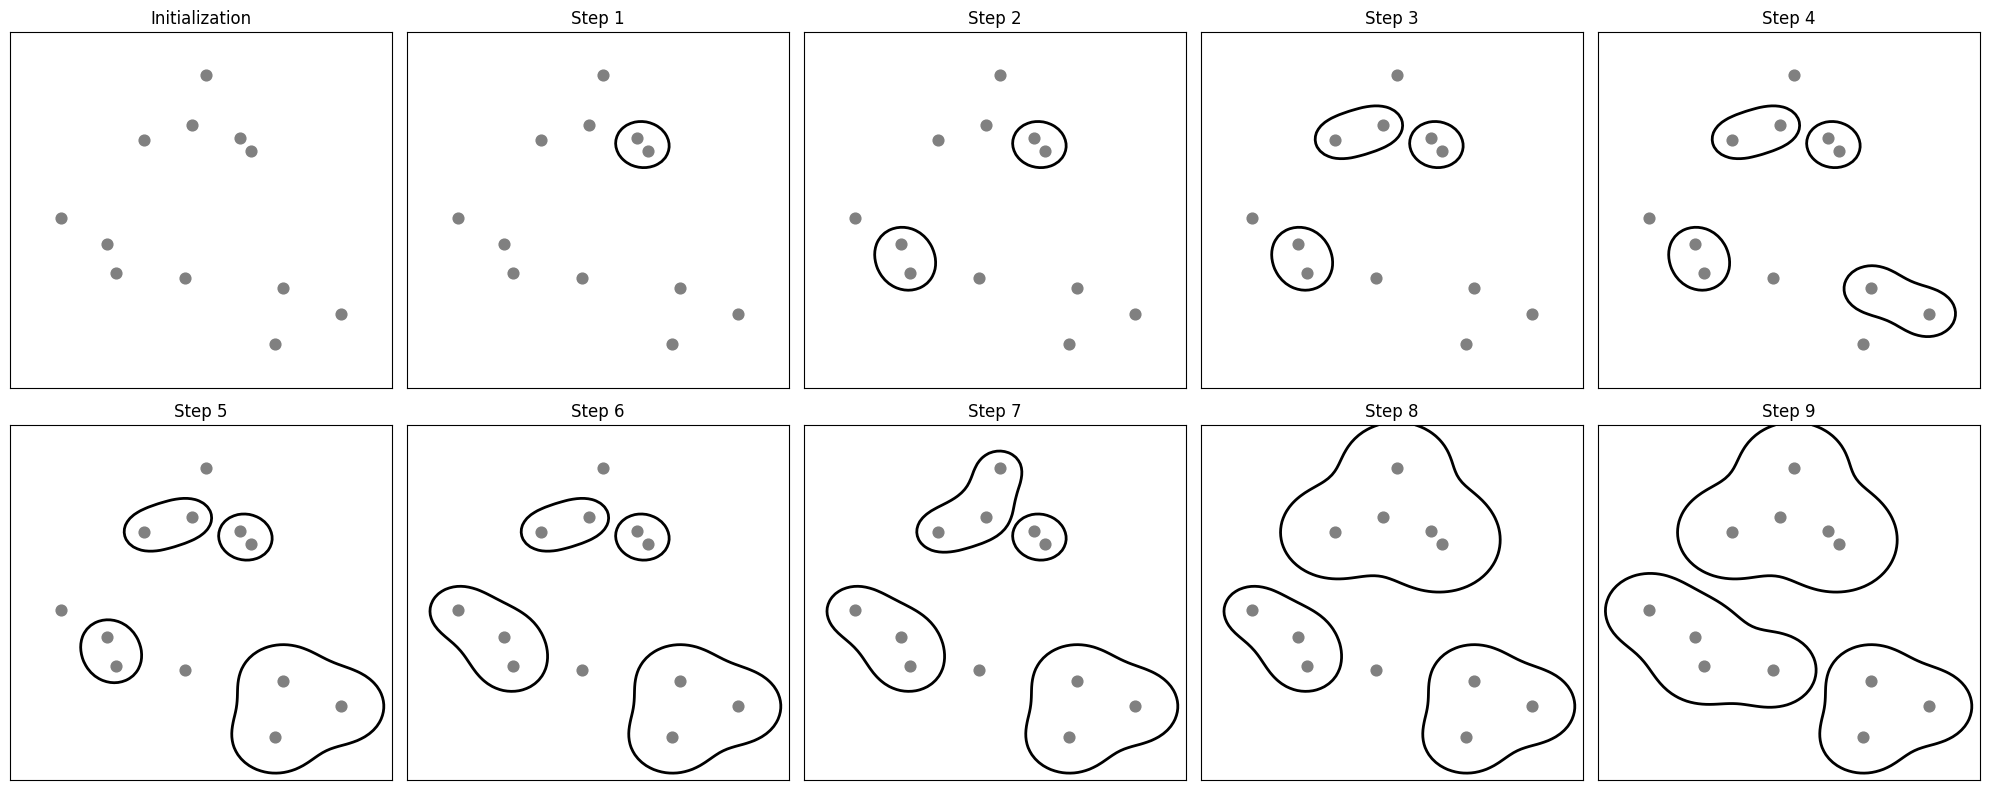

In [73]:
mglearn.plots.plot_agglomerative_algorithm()

plt.tight_layout()
plt.savefig('Images/03Clustering-10.png', bbox_inches='tight')
plt.show()

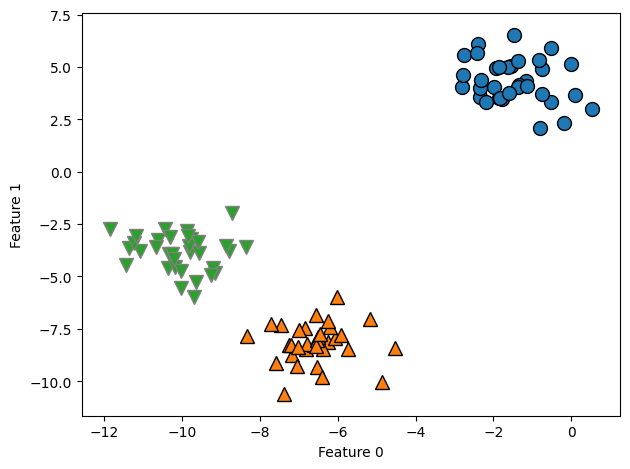

In [76]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

plt.tight_layout()
plt.savefig('Images/03Clustering-11.png', bbox_inches='tight')
plt.show()

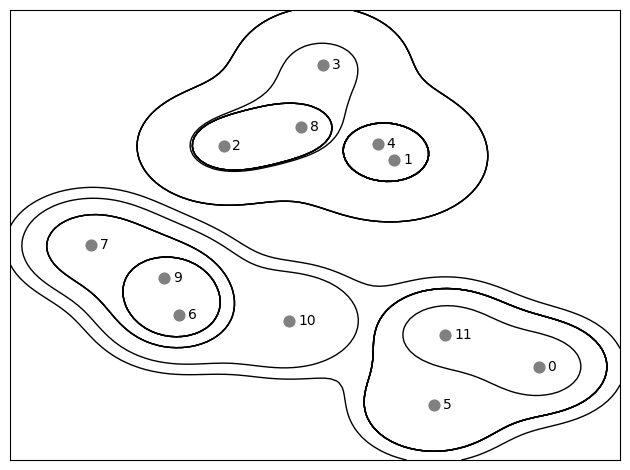

In [78]:
mglearn.plots.plot_agglomerative()

plt.tight_layout()
plt.savefig('Images/03Clustering-12.png', bbox_inches='tight')
plt.show()

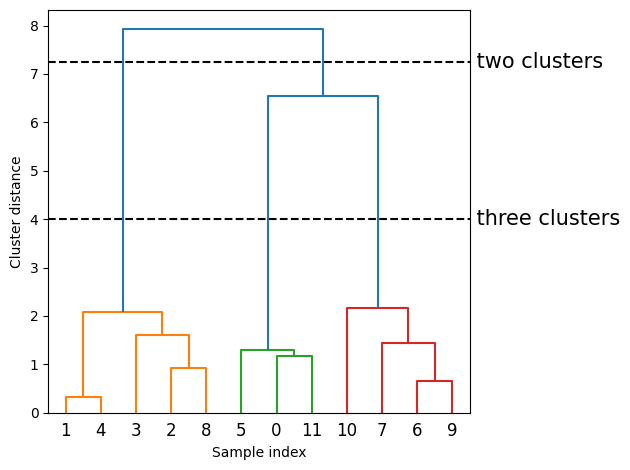

In [80]:
# 从SciPy中导入dendrogram函数和ward聚类函数
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# 将ward聚类应用于数据数组X
# SciPy的ward函数返回一个数组，指定执行凝聚聚类时跨越的距离
linkage_array = ward(X)
# 现在为包含簇之间距离的linkage_array绘制树状图
dendrogram(linkage_array)

# 在树中标记划分成两个簇或三个簇的位置
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

plt.tight_layout()
plt.savefig('Images/03Clustering-13.png', bbox_inches='tight')
plt.show()

In [81]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


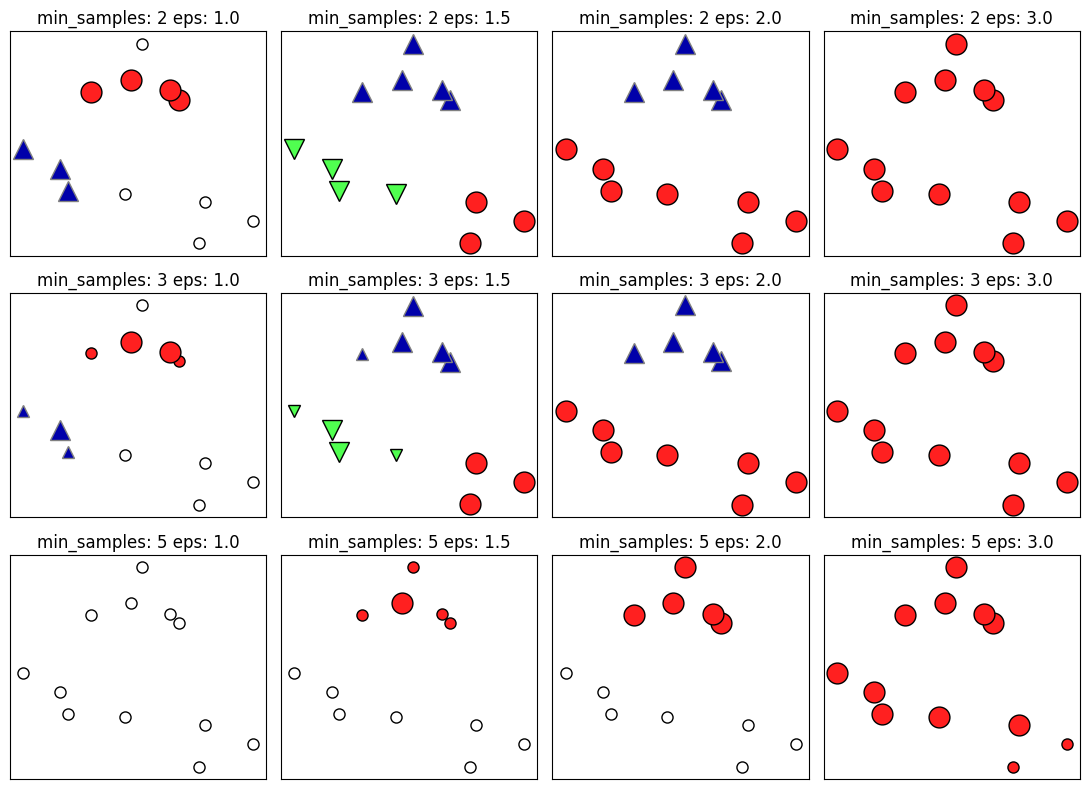

In [83]:
mglearn.plots.plot_dbscan()

plt.tight_layout()
plt.savefig('Images/03Clustering-14.png', bbox_inches='tight')
plt.show()

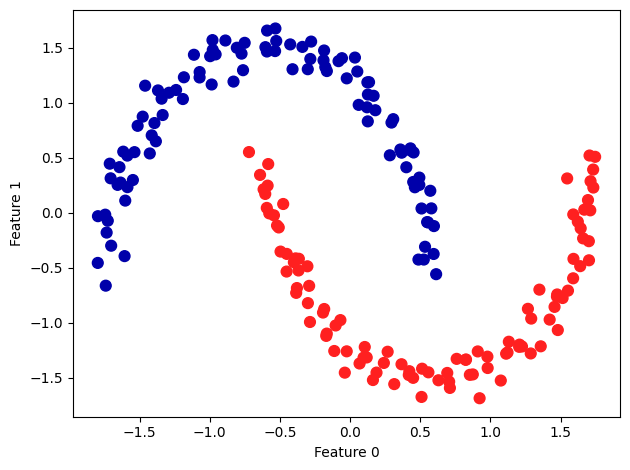

In [85]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 将数据缩放成平均值为0、方差为1
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 绘制簇分配
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

plt.tight_layout()
plt.savefig('Images/03Clustering-15.png', bbox_inches='tight')
plt.show()

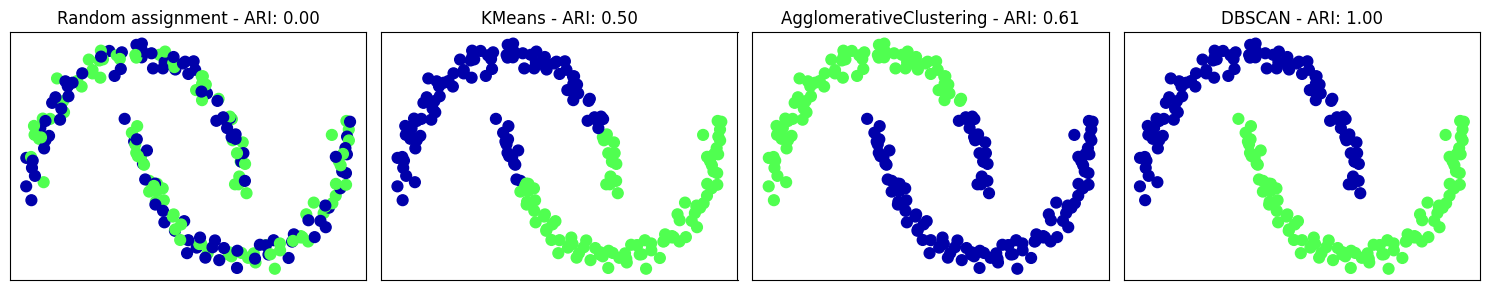

In [87]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 将数据缩放成平均值为0、方差为1
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 列出要使用的算法
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# 创建一个随机的簇分配，作为参考
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 绘制随机分配
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 绘制簇分配和簇中心
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))


plt.tight_layout()
plt.savefig('Images/03Clustering-16.png', bbox_inches='tight')
plt.show()


In [88]:
from sklearn.metrics import accuracy_score

# 这两种点标签对应于相同的聚类
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# 精度为0，因为二者标签完全不同
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# 调整rand分数为1，因为二者聚类完全相同
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


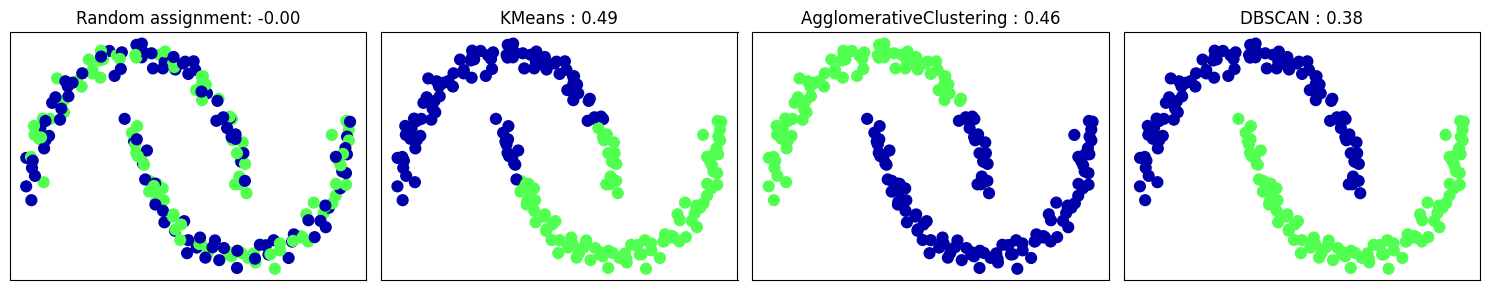

In [90]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# 将数据缩放成平均值为0、方差为1
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 创建一个随机的簇分配，作为参考
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 绘制随机分配
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
    cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # 绘制簇分配和簇中心
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))

plt.tight_layout()
plt.savefig('Images/03Clustering-17.png', bbox_inches='tight')
plt.show()

In [93]:
# 从lfw数据中提取特征脸，并对数据进行变换
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

In [92]:
# 应用默认参数的DBSCAN
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [94]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [95]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1  0]


In [96]:
# 计算所有簇中的点数和噪声中的点数。
# bincount不允许负值，所以我们需要加1。
# 结果中的第一个数字对应于噪声点。
print("Number of points per cluster: {}".format(np.bincount(labels + 1)))

Number of points per cluster: [  37 2026]


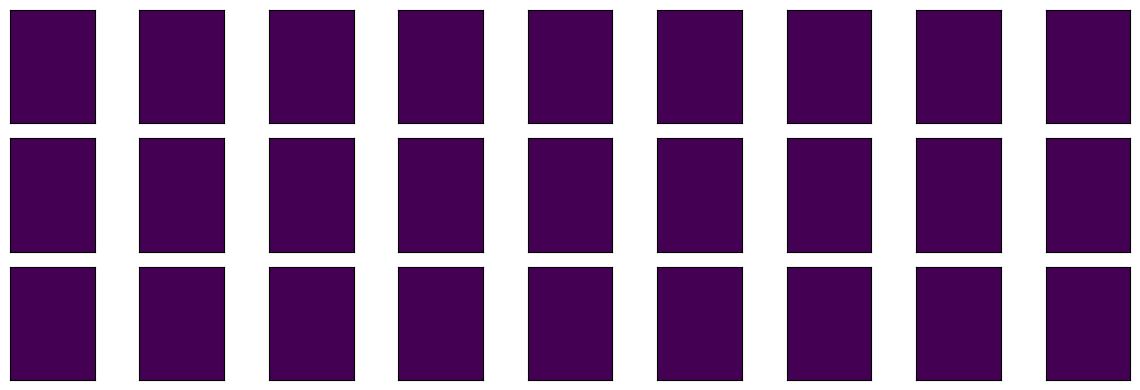

In [98]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

plt.tight_layout()
plt.savefig('Images/03Clustering-18.png', bbox_inches='tight')
plt.show()

In [99]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("Clusters present: {}".format(np.unique(labels)))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=1
Clusters present: [-1]
Cluster sizes: [2063]

eps=3
Clusters present: [-1]
Cluster sizes: [2063]

eps=5
Clusters present: [-1  0]
Cluster sizes: [2059    4]

eps=7
Clusters present: [-1  0  1  2  3  4  5  6]
Cluster sizes: [1954   75    4   14    6    4    3    3]

eps=9
Clusters present: [-1  0  1]
Cluster sizes: [1199  861    3]

eps=11
Clusters present: [-1  0]
Cluster sizes: [ 403 1660]

eps=13
Clusters present: [-1  0]
Cluster sizes: [ 119 1944]


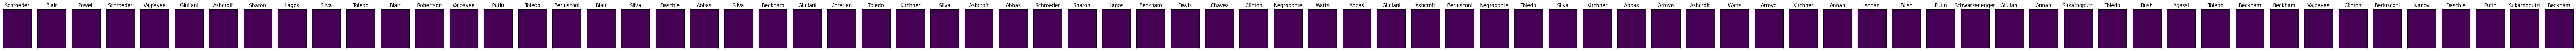

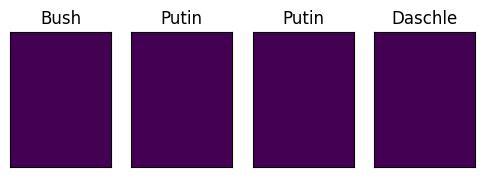

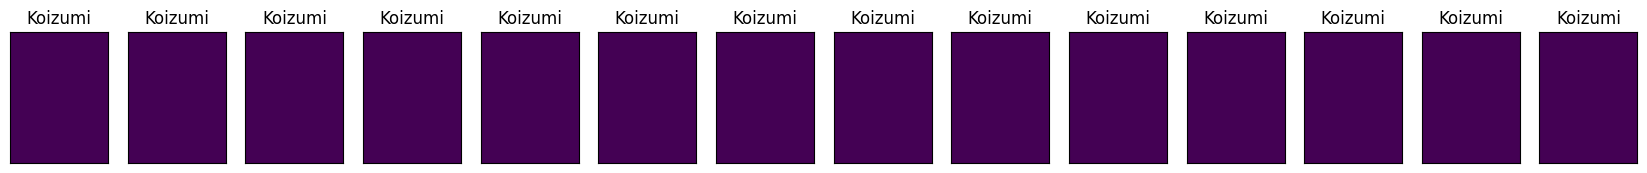

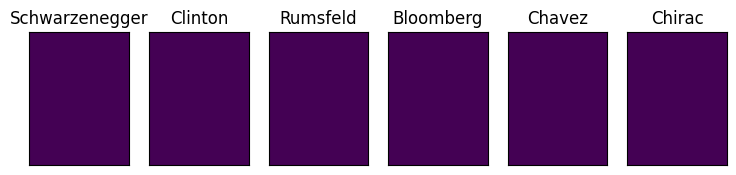

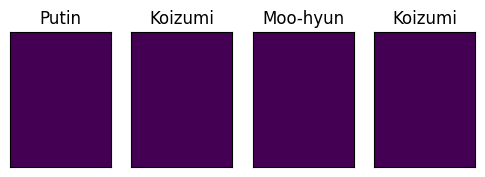

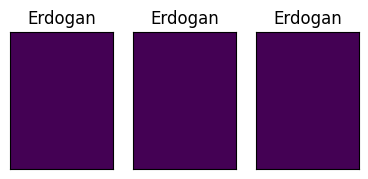

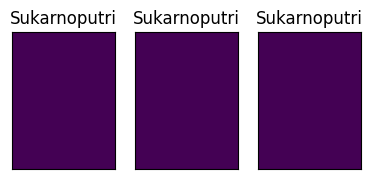

In [105]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images =  np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):

        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])
        

In [106]:
# 用k均值提取簇
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

Cluster sizes k-means: [  5 286 190 275 185 493   1 286   2 340]


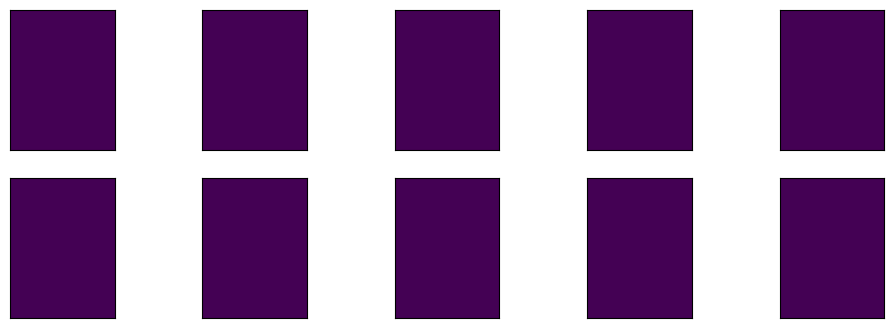

In [107]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),
              vmin=0, vmax=1)

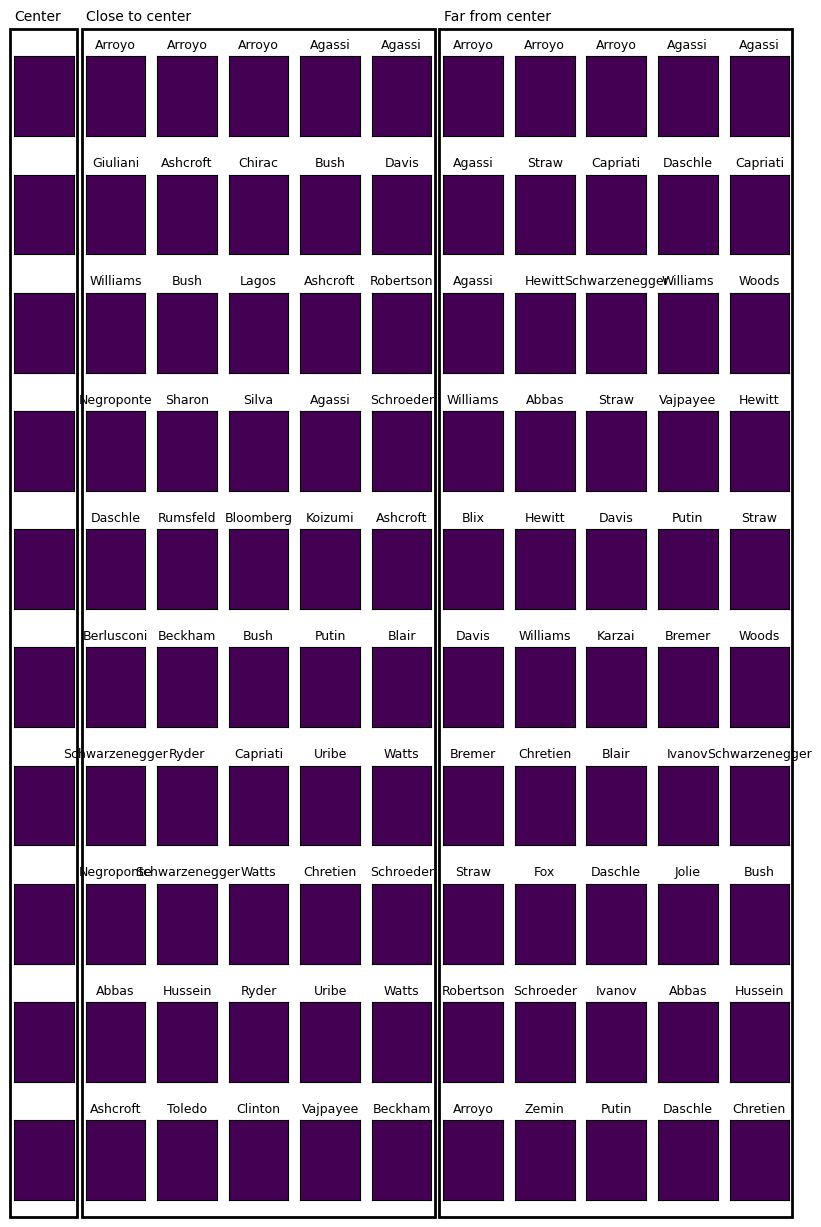

In [108]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people,
                                y_people, people.target_names)

In [109]:
# 用ward凝聚聚类提取簇
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("Cluster sizes agglomerative clustering: {}".format(
    np.bincount(labels_agg)))

Cluster sizes agglomerative clustering: [264 100 275 553  49  64 546  52  51 109]


In [110]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.09


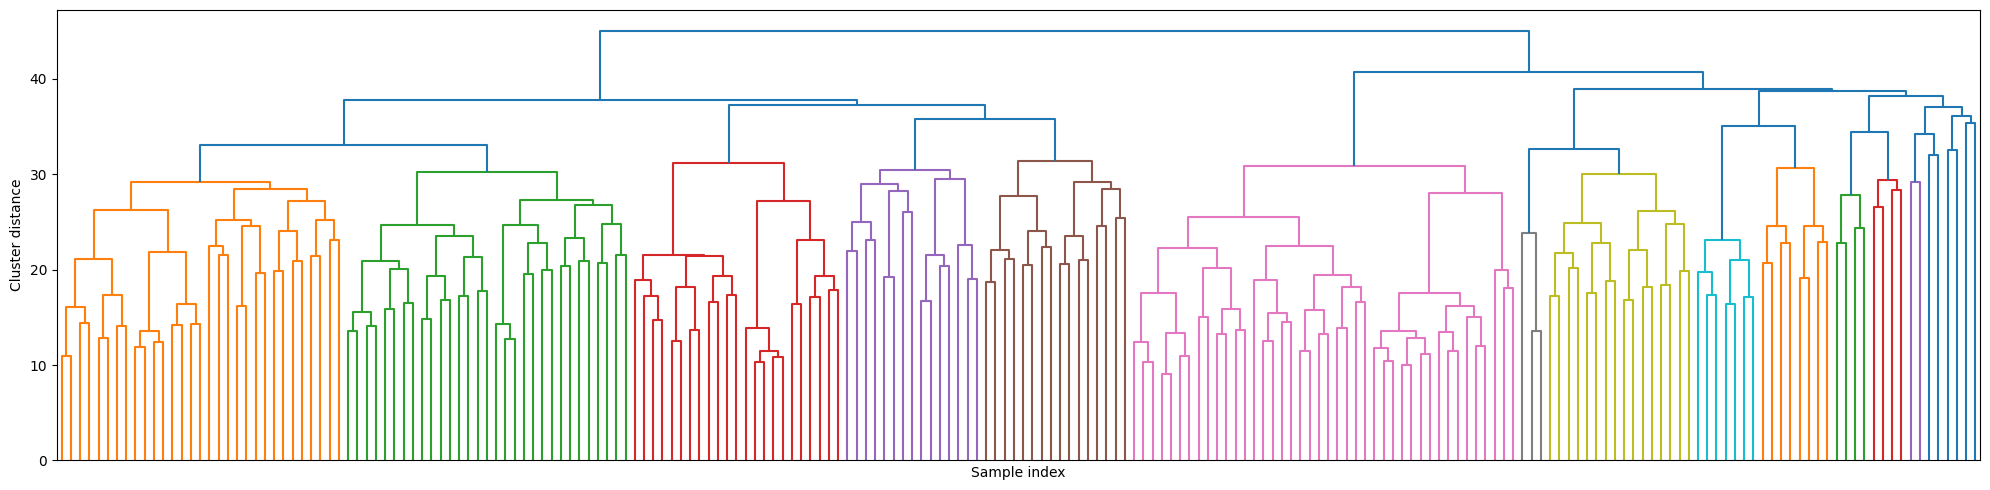

In [112]:
linkage_array = ward(X_pca)
# 现在我们为包含簇之间距离的linkage_array绘制树状图
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

plt.tight_layout()
plt.savefig('Images/03Clustering-20.png', bbox_inches='tight')
plt.show()

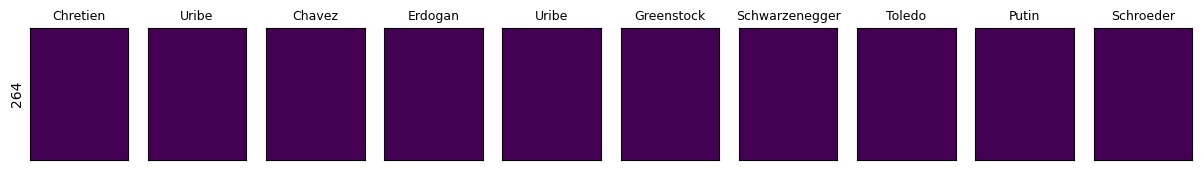

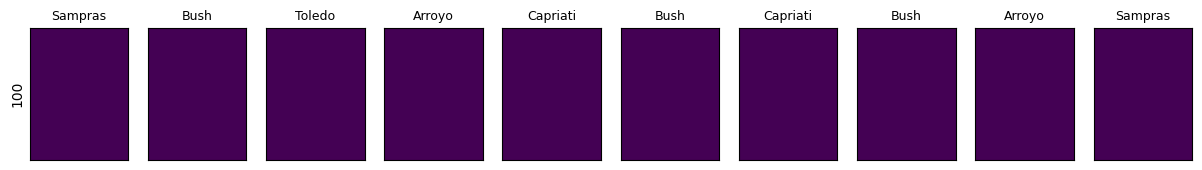

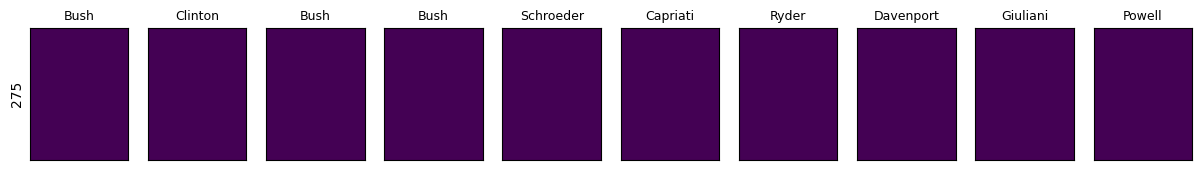

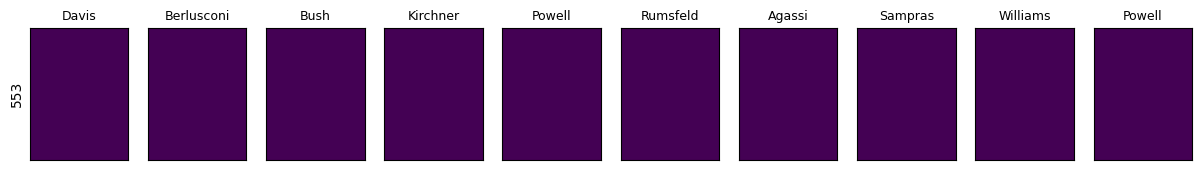

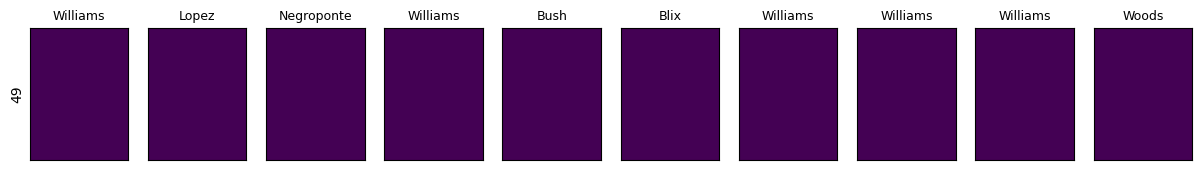

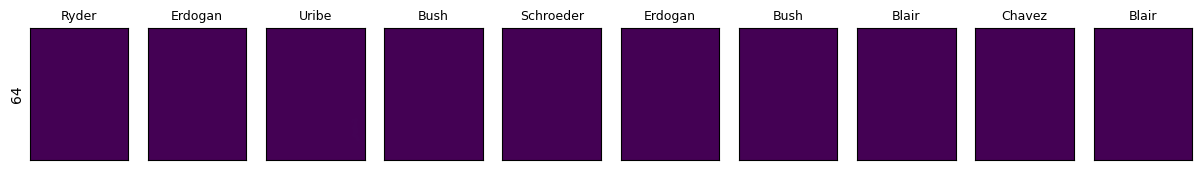

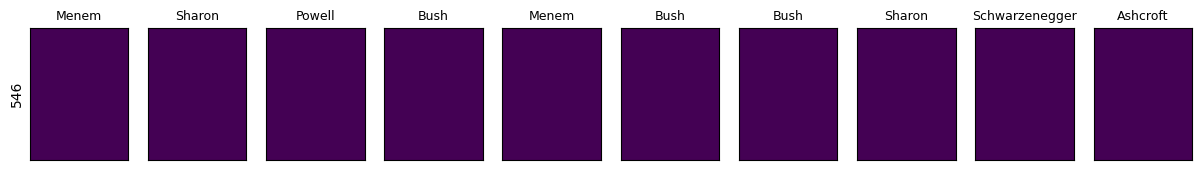

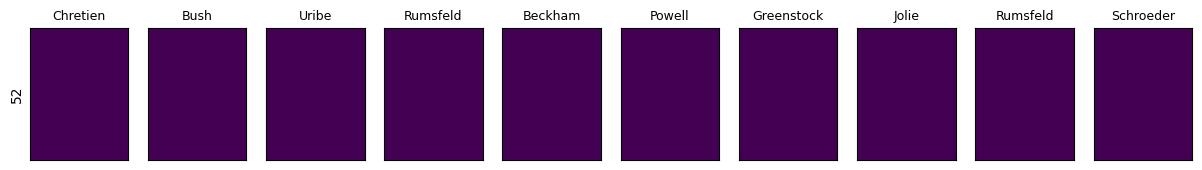

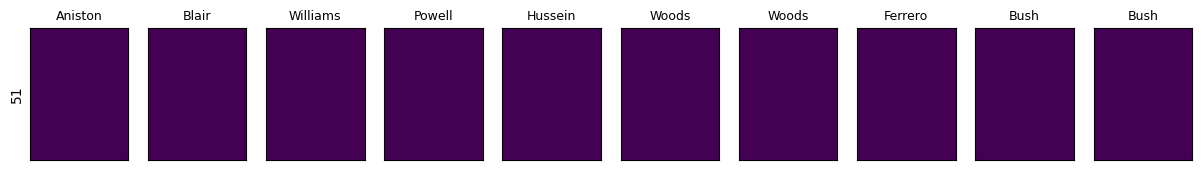

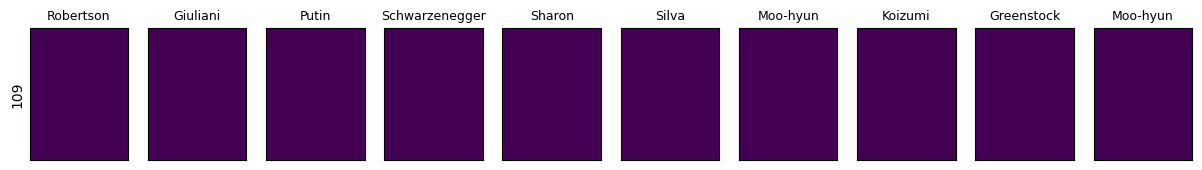

In [113]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})

cluster sizes agglomerative clustering: [139  35  23   2 111  39 106  33   5 161  60  41  70  17  30  20 134  40
  23  38  56 264   4  35  44  16  29 135  25  37  42  34   3  17  31   3
  21  27  76  37]


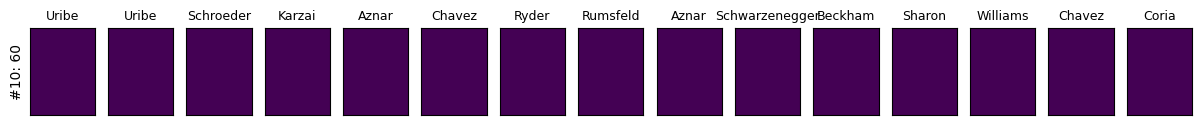

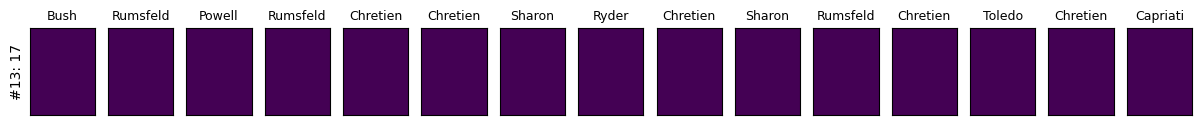

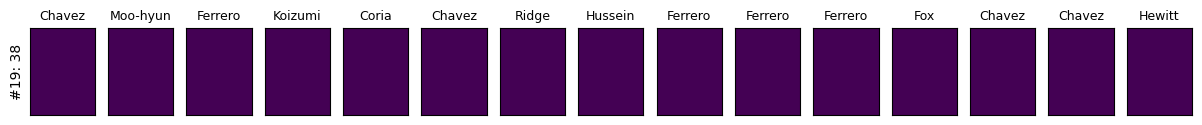

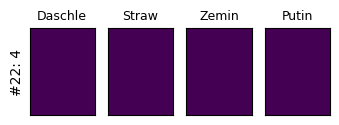

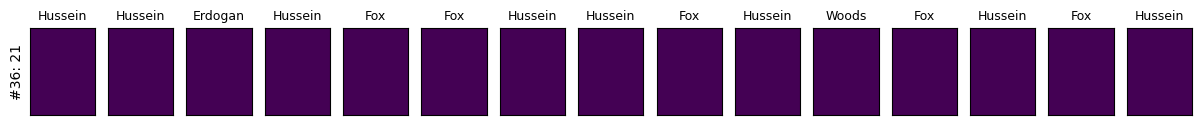

In [114]:
# 用ward凝聚聚类提取簇
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

n_clusters = 40
for cluster in [10, 13, 19, 22, 36]: # 手动挑选“有趣的”簇
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)